#  Import dataset

In [1]:
# load the basic package
import pandas as pd
import numpy as nd
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
# load the original dataset
df=pd.read_csv("dataprocess/ai_original_dataset.csv")
# show the top 5 record
df.head()

Unnamed: 0  author id    username                 created_at  geo  \
0           0   20233087  MrsDurham_  2010-01-30 17:42:11+00:00  NaN   
1           1   80952773  MrsDurham_  2010-01-30 17:32:08+00:00  NaN   
2           2   41416680  MrsDurham_  2010-01-30 09:44:35+00:00  NaN   
3           3   47052140  MrsDurham_  2010-01-30 07:40:19+00:00  NaN   
4           4   18110290  MrsDurham_  2010-01-30 02:52:10+00:00  NaN   

           id lang  like_count  quote_count  reply_count  retweet_count  \
0  8418832289   en           0            0            0              0   
1  8418509020   en           0            0            0              1   
2  8406642200   en           0            0            0              0   
3  8404189626   en           0            0            0              0   
4  8395814978   en           0            0            0              0   

               source                                              tweet  \
0  Twitter Web Client  I wish these people on #AI would stop giving m...   
1  Twitter Web Client  RT @spacefuture: "Artificial Intelligence Will...   
2  Twitter Web Client                     This dude is crying!! Hai! #ai   
3  Twitter Web Client  @JesusMonsterr did ya c #AI 2nit?? omg that du...   
4  Twitter Web Client  Watching #AI on the DVR- if Avril Lavigne want...   

   in_reply_to                                              users  followers  \
0          NaN  ['flaviogomes69', 'MsBass_', 'Tanakavgp', 'esq...       2170   
1          NaN  ['flaviogomes69', 'MsBass_', 'Tanakavgp', 'esq...       2170   
2          NaN  ['flaviogomes69', 'MsBass_', 'Tanakavgp', 'esq...       2170   
3   53314252.0  ['flaviogomes69', 'MsBass_', 'Tanakavgp', 'esq...       2170   
4          NaN  ['flaviogomes69', 'MsBass_', 'Tanakavgp', 'esq...       2170   

   tweet count  
0        58074  
1        58074  
2        58074  
3        58074  
4        58074

In [3]:
#drop weird column showing up "Unnamed: 0". 
df = df.drop(columns=['Unnamed: 0'])
df.head()

author id    username                 created_at  geo          id lang  \
0   20233087  MrsDurham_  2010-01-30 17:42:11+00:00  NaN  8418832289   en   
1   80952773  MrsDurham_  2010-01-30 17:32:08+00:00  NaN  8418509020   en   
2   41416680  MrsDurham_  2010-01-30 09:44:35+00:00  NaN  8406642200   en   
3   47052140  MrsDurham_  2010-01-30 07:40:19+00:00  NaN  8404189626   en   
4   18110290  MrsDurham_  2010-01-30 02:52:10+00:00  NaN  8395814978   en   

   like_count  quote_count  reply_count  retweet_count              source  \
0           0            0            0              0  Twitter Web Client   
1           0            0            0              1  Twitter Web Client   
2           0            0            0              0  Twitter Web Client   
3           0            0            0              0  Twitter Web Client   
4           0            0            0              0  Twitter Web Client   

                                               tweet  in_reply_to  \
0  I wish these people on #AI would stop giving m...          NaN   
1  RT @spacefuture: "Artificial Intelligence Will...          NaN   
2                     This dude is crying!! Hai! #ai          NaN   
3  @JesusMonsterr did ya c #AI 2nit?? omg that du...   53314252.0   
4  Watching #AI on the DVR- if Avril Lavigne want...          NaN   

                                               users  followers  tweet count  
0  ['flaviogomes69', 'MsBass_', 'Tanakavgp', 'esq...       2170        58074  
1  ['flaviogomes69', 'MsBass_', 'Tanakavgp', 'esq...       2170        58074  
2  ['flaviogomes69', 'MsBass_', 'Tanakavgp', 'esq...       2170        58074  
3  ['flaviogomes69', 'MsBass_', 'Tanakavgp', 'esq...       2170        58074  
4  ['flaviogomes69', 'MsBass_', 'Tanakavgp', 'esq...       2170        58074

In [4]:
# show the structure and content of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154324 entries, 0 to 1154323
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   author id      1154324 non-null  int64  
 1   username       1154324 non-null  object 
 2   created_at     1154324 non-null  object 
 3   geo            8471 non-null     object 
 4   id             1154324 non-null  int64  
 5   lang           1154324 non-null  object 
 6   like_count     1154324 non-null  int64  
 7   quote_count    1154324 non-null  int64  
 8   reply_count    1154324 non-null  int64  
 9   retweet_count  1154324 non-null  int64  
 10  source         1153425 non-null  object 
 11  tweet          1154324 non-null  object 
 12  in_reply_to    43769 non-null    float64
 13  users          1154324 non-null  object 
 14  followers      1154324 non-null  int64  
 15  tweet count    1154324 non-null  int64  
dtypes: float64(1), int64(8), object(7)
memory usage: 140.9

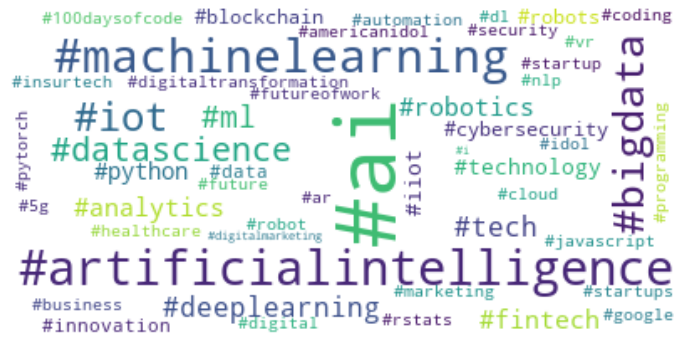

#ai                        895494
#artificialintelligence    164326
#machinelearning           148754
#bigdata                   117103
#iot                       112392
                            ...  
#setthetone                     1
#aiadesignweek                  1
#upfamily                       1
#upcorepl                       1
#indiehackers                   1
Name: tweet, Length: 117746, dtype: int64

In [5]:
# show the hashtags of dataset using Wrodcloud
# Count the number of occurrences of each hashtag in the 'tweet' column, after converting the text to lowercase
hashfreq= df['tweet'].str.lower().str.findall(r'(#\w+)').explode().value_counts()

# Customize the color scheme and set the maximum number of words
wc = WordCloud(
    background_color='#fff',
    max_words=50,
    stopwords=STOPWORDS
)
wc.generate_from_frequencies(hashfreq[:])

# Adjust the size of the figure
plt.figure(figsize=(12,8))

# Show the word cloud
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
hashfreq

# Preprocessing

## Basic preprocessing

In [6]:
# check non-English tweets and remove,result show there are all English tweets
df.groupby('lang').count()

author id  username  created_at   geo       id  like_count  quote_count  \
lang                                                                            
en      1154324   1154324     1154324  8471  1154324     1154324      1154324   

      reply_count  retweet_count   source    tweet  in_reply_to    users  \
lang                                                                       
en        1154324        1154324  1153425  1154324        43769  1154324   

      followers  tweet count  
lang                          
en      1154324      1154324

In [7]:
# remove the tweets not posted by Twitter official platform, should contain 'Twitter' keyword
df=df[df['source'].str.lower().str.contains('twitter',na = False,regex=True)]
# convert the date formate into yyyy-mm-dd
df['created_at']=pd.to_datetime(df['created_at'])
df['created_at']=df['created_at'].dt.date
# created a new columns calculating user involvement, how many tweets posted related to AI
involve_count=df.groupby('username').size().reset_index(name='involve_count')
df=pd.merge(df,involve_count,on='username',how='left')

In [8]:
# remove duplicated tweets like retweets
#first drop the duplicated 
df = df.drop_duplicates(subset='tweet')
# second, remove retweeted tweets
df = df[~df['tweet'].str.contains('RT @')]

In [125]:
#Third, using FuzzyWuzzy library to remove higher similarity/ duplicated tweets
# this function will take a long runing time for several days
from fuzzywuzzy import fuzz, process

def deduplicate_fuzzy(df, tweet, threshold):
    # Initialize an empty list to store 
    deduplicated_indices = [] 

    for i, row in df.iterrows():
        duplicate = any(fuzz.ratio(row[tweet], df.loc[j, tweet]) >= threshold
                        for j in deduplicated_indices)
        # If a tweet is not a duplicate, add it to the deduplicated list
        if not duplicate:
            deduplicated_indices.append(i)

    deduplicated_df = df.loc[deduplicated_indices].reset_index(drop=True)  # Create a new dataframe using the deduplicated indices

    return deduplicated_df


In [ ]:
# Call the deduplication function and store the deduplicated strings
#threshold range 0 to 100(higher values indicate greater similarity), and set to 80
deduplicated_texts = deduplicate_fuzzy(df, 'tweet', 80)

In [ ]:
#save the result,and only choose relevant columns to next step preprocessing
df_pre=deduplicated_texts.copy()
df_pre= df_pre.drop(columns=[['geo','lang','source','in_reply_to','users']])
#save the preprocessed dataset to file in case of quickly read again
#df_pre.to_csv("dataprocess/afterpreprocess.csv",index=False)

In [9]:
#load the preprocessed dataset
#df_pre=pd.read_csv("dataprocess/afterpreprocess.csv")
#df_pre

## In-depth preprocessing

In [10]:
# using NLTK package bulit-in Python for preprocessing
# the preprocessing code is used from "Critical Data Mining of Media Culture" Manual (url=https://jveerbeek.gitlab.io/data-mining/index.html)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
lemmatizer=nltk.stem.WordNetLemmatizer()
nltk.download('punkt')  
import string
nltk.download('wordnet')  # lemmatize 
from nltk.corpus import wordnet  # lemmatize pos
nltk.download('averaged_perceptron_tagger') # lemmatize pos
import re  # regular expression

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\70733\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\70733\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\70733\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\70733\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
#step 1 (text cleaning): remove URLs, stand-alone numbers, hashtags(#), mention(@) from the tweet.
def cleaning1(x):
    x=re.sub(r'(http|https)://\S+|@\w+|\b\d+\b|#(\w+)', '',x,flags=re.IGNORECASE) 
    return x

In [12]:
# step 2:  using Spacy package to select noun words again for the first time
#  using the Spacy package to select nouns for the first round
import spacy
nlp = spacy.load("en_core_web_sm")
def cleaning2(x):
    x=nlp(x)
    text =' '.join([ent.text for ent in x if ent.pos_=='NOUN'])
    return text


In [13]:
# step 3:lowercase,lemmatization
# in order to make lemmatize more accurate, we need to sign the pos,
# see this function more detail on url:Johnson,D.(2023).POS Tagging and Chunking with NLTK. Retrieved from https://www.guru99.com/pos-tagging-chunking-nltk.html
# ths function for getting the POS of words
def get_wordnet_pos(tag):
     # adjective words
    if tag.startswith('J'):
        return wordnet.ADJ
    # verbs words
    elif tag.startswith('V'):
        return wordnet.VERB
     # noun. words
    elif tag.startswith('N'):
        return wordnet.NOUN
    #adverb words 
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.ADJ  # default to adjective
    
# this function use for lemmatization
def cleaning3(x):
    #convert into lowercase
    x=x.lower()
    x=word_tokenize(x)
    tagged_sent = nltk.pos_tag(x)  #get the pos
    lemma=[]
    for word,pos in tagged_sent:
        pos_word=get_wordnet_pos(pos)
        lemmatized_word=lemmatizer.lemmatize(word,pos=pos_word)
        lemma.append(lemmatized_word)
    x=' '.join(lemma)
    return x


In [14]:
# step 4: tokenization and remove punctuations
stopword=stopwords.words('english')
# customize the stop words and add to stopword list
new_sw = ['ai', 'artificial intelligence','ml','amp','idol','lol','app','time','date', 'second', 'minute', 'hour', 'day',
          'week', 'month', 'year', 'decade', 'century', 'millennium','epoch', 'era', 'age', 'eon', 'season', 'quarter', 
          'morning', 'noon', 'afternoon', 'evening', 'night', 'dawn', 'dusk', 'sunrise', 'sunset', 'midnight','tonight','weekend',
          'today', 'tomorrow', 'yesterday','spring', 'summer', 'autumn', 'fall', 'winter', 'january', 'february', 'march', 'april',
          'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december','am','pm','news','test','love','dude','name','thing',
          'lot','tech','compute','talk','use','play','cc','rt','dont','i','learn','self','example','blog','post','guy','link','look','part','jlo',
          'start','shit','info','ppl','mom','pic','ceo','drone','top','bottom','tweet','hr'] 

stopword.extend(new_sw)

def cleaning4(x):
    #remove punctuation
    x=x.translate(str.maketrans(' ',' ',string.punctuation))
    #tokenization sentences
    x=word_tokenize(x)
    #remove stop words
    x=[word for word in x if word not in stopword ]  # must first tokenize sentence before removing stopwords, otherwise, the word removed by mistake
    x=' '.join(x)
    return x

In [15]:
#step 5:remove emjis,emoticon and others
import re
import emoji
def cleaning5(text):
    x = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001F900-\U0001F9FF"  # Supplementary Symbols and Pictographs
                               u"\U0001F018-\U0001F270"  # Various asian characters
                               u"\U0001F300-\U0001F5FF"  # Misc symbols (part 1)
                               u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                               u"\U0001F1E6-\U0001F1FF"  # Country Flags
                               u"\U0001F191-\U0001F19A"  # Various asian characters
                               u"\U00002300-\U000023FF"  # Misc symbols (part 2)
                               u"\U000024C2-\U0001FA9F"  # Lots of stuff (including lots of not yet assigned, and lots of emoji)
                               u"\U0000FE00-\U0000FE0F"  # Variation Selectors
                               u"\U0001F900-\U0001F9FF"  # Symbols and Pictographs Extended-A
                               u"\U0001FA70-\U0001FAFF"  # Ornaments and other symbols
                               u"\U00002700-\U000027BF"  # Dingbats
                               u"\U0001F680-\U0001F6FF"  # Transport and Map
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Misc Symbols
                               "]+", flags=re.UNICODE)
    return x.sub(r'', text)


In [16]:
# step 6: for topic modeling ,only 'NOUN' words will be selected for the second times
def cleaning6(x):
    # clean the noisy characters,single string or other non significant words 
    noisy_words = ['vp', 'bi', 'bos', 'ur', 'ftw', 'tht', 'pt', 'nyc', 'dan', 'im','gt']
    noisy_words_pattern = '|'.join(noisy_words)
    x = re.sub(rf'\b({noisy_words_pattern})\b|’|”|“|\b\w\b', '',x)  # remove single/noisy character and special punctuation
    #tokenization
    x=word_tokenize(x)
    # pos_tagged = nltk.pos_tag
    pos_tagged = nltk.pos_tag(x)
    #choose 'NOUN' only using NLTK for the second round
    x=[text for text, pos in pos_tagged if pos == 'NN']
    return x

In [17]:
# for sentiment analysis, only choose step 1 due to using Vader sentiment Analysis
df_pre_st=df_pre.copy()
df_pre_st['tweet_clean']=df_pre_st['tweet'].apply(lambda x:cleaning1(x))
df_pre_st.head()

author id    username  created_at          id  like_count  quote_count  \
0   20233087  MrsDurham_  2010-01-30  8418832289           0            0   
1   41416680  MrsDurham_  2010-01-30  8406642200           0            0   
2   47052140  MrsDurham_  2010-01-30  8404189626           0            0   
3   18110290  MrsDurham_  2010-01-30  8395814978           0            0   
4   23487853  MrsDurham_  2010-01-30  8392841396           0            0   

   reply_count  retweet_count  \
0            0              0   
1            0              0   
2            0              0   
3            0              0   
4            0              0   

                                               tweet  followers  tweet count  \
0  I wish these people on #AI would stop giving m...       2170        58074   
1                     This dude is crying!! Hai! #ai       2170        58074   
2  @JesusMonsterr did ya c #AI 2nit?? omg that du...       2170        58074   
3  Watching #AI on the DVR- if Avril Lavigne want...       2170        58074   
4  is it just me, & not that I'm a fan, but r peo...       2170        58074   

   involve_count                                        tweet_clean  
0            432  I wish these people on  would stop giving me g...  
1            432                        This dude is crying!! Hai!   
2            432   did ya c  2nit?? omg that dude singin amazing...  
3            432  Watching  on the DVR- if Avril Lavigne wanted ...  
4            432  is it just me, & not that I'm a fan, but r peo...

In [18]:
#for topic modeling, choose from step 1 to step 6 cleaning
df_pre_tm=df_pre.copy()
df_pre_tm['tweet_nlp']=df_pre_tm['tweet'].apply(lambda x:cleaning1(x))
df_pre_tm['tweet_nlp']=df_pre_tm['tweet_nlp'].apply(lambda x:cleaning2(x))
df_pre_tm['tweet_nlp']=df_pre_tm['tweet_nlp'].apply(lambda x:cleaning3(x))
df_pre_tm['tweet_nlp']=df_pre_tm['tweet_nlp'].apply(lambda x:cleaning4(x))
df_pre_tm['tweet_nlp']=df_pre_tm['tweet_nlp'].apply(lambda x:cleaning5(x))
df_pre_tm['tweet_nlp']=df_pre_tm['tweet_nlp'].apply(lambda x:cleaning6(x))
df_pre_tm.head()

author id    username  created_at          id  like_count  quote_count  \
0   20233087  MrsDurham_  2010-01-30  8418832289           0            0   
1   41416680  MrsDurham_  2010-01-30  8406642200           0            0   
2   47052140  MrsDurham_  2010-01-30  8404189626           0            0   
3   18110290  MrsDurham_  2010-01-30  8395814978           0            0   
4   23487853  MrsDurham_  2010-01-30  8392841396           0            0   

   reply_count  retweet_count  \
0            0              0   
1            0              0   
2            0              0   
3            0              0   
4            0              0   

                                               tweet  followers  tweet count  \
0  I wish these people on #AI would stop giving m...       2170        58074   
1                     This dude is crying!! Hai! #ai       2170        58074   
2  @JesusMonsterr did ya c #AI 2nit?? omg that du...       2170        58074   
3  Watching #AI on the DVR- if Avril Lavigne want...       2170        58074   
4  is it just me, & not that I'm a fan, but r peo...       2170        58074   

   involve_count          tweet_nlp  
0            432              [coz]  
1            432                 []  
2            432            [grace]  
3            432          [costume]  
4            432  [fan, man, stuff]

In [136]:
#save the dataset, in case of quickly read again
#df_pre_tm.to_csv("dataprocess/df_pre_tm.csv",index=False)

In [3]:
# load the preprocessing dataset for topic modelling
#df_pre_tm=pd.read_csv("dataprocess/df_pre_tm.csv")
# if you read the dataset from the file , need to onvert the loaded strings back to lists of tokens  before performing topic modelling
#df_pre_tm['tweet_nlp']=df_pre_tm['tweet_nlp'].apply(eval)

# Topic Modeling

In [19]:
#just choose the relevant columns for topic modeling
df_pre_tm=df_pre_tm[['created_at','username','id','tweet','tweet_nlp']]
# remove empty token record
df_pre_tm=df_pre_tm[df_pre_tm['tweet_nlp'].map(lambda x: len(x)) > 0]
#reset index
df_pre_tm.reset_index(drop=True, inplace=True)

## Latent Dirichlet allocation(LDA) 

In [20]:
# using Gensim package LDA model for topic modeling, LDA model
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel,CoherenceModel
#base
import pandas as pd
import numpy as np
#visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models
from IPython.display import display
import math

C:\Users\70733\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


### detecting the optimal paremeter no_below and no_above

In [97]:
# detect the optimal noblew and no_above
no_below=[5,10,25,50,70,90,100,120,130,150,500,750,1000,1500,2000]
no_above=[0.6,0.7,0.8,0.9,1]
# create the dictionary
id2word_default=corpora.Dictionary(df_pre_tm['tweet_nlp'])
#create the text
texts=df_pre_tm['tweet_nlp']
#initialize the varible to store the best model 
best_para={}

# range from 2 to 25, step is 2
start = 2
limit = 25
step = 2
def filter_words(x,y,id2word=id2word_default):
    id2word.filter_extremes(no_below=x, no_above=y)
    corpus=[id2word.doc2bow(text) for text in df_pre_tm['tweet_nlp']]
    return id2word,corpus

# Finding best number of topics,use coherence to find the best
def compute_coherence(corpus,dictionary,texts,start,limit,step):
    coherence_values=[]
    model_list=[]
    for num_topics in range(start, limit, step):
        #print('Calculating for',num_topics,'topics')
        model=LdaModel(corpus=corpus,num_topics=num_topics,id2word=dictionary,iterations=200)
        model_list.append(model)
        coherence=CoherenceModel(model=model,dictionary=dictionary,texts=texts,coherence='c_v')
        coherence_values.append(coherence.get_coherence())
    return model_list,coherence_values


#plot the coherence value
def plot_num_topic(start,limit,step,coherence_values,no_blow,no_above):
    x=range(start,limit,step)
    plt.plot(x,coherence_values)
    plt.xlabel('number of topics')
    plt.ylabel('coherence value')
    plt.title(f' no_blow: {no_blow}; no_above: {no_above}')
    plt.legend(('coherence_values'),loc='best')
    plt.vlines(x[np.argmax(coherence_values)], plt.ylim()[0], plt.ylim()[1],linestyles='dashed')
    plt.xticks(x)  # This line sets the x-axis ticks to the values of 'x'
    plt.show()
    


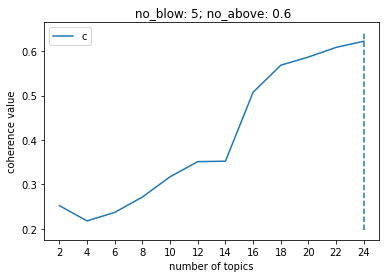

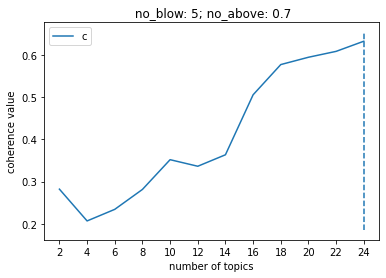

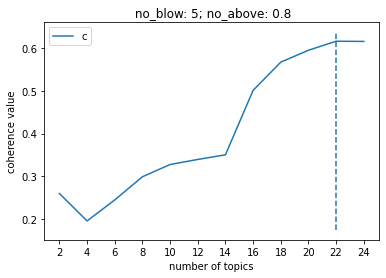

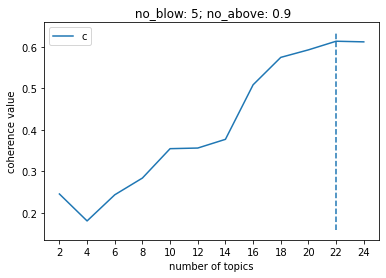

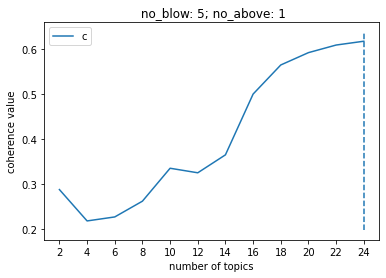

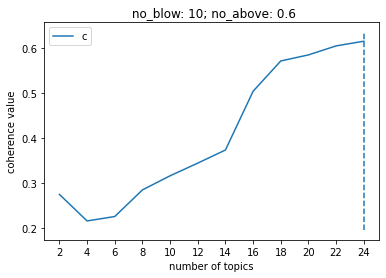

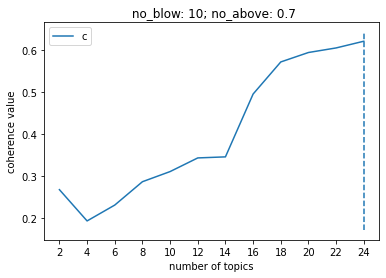

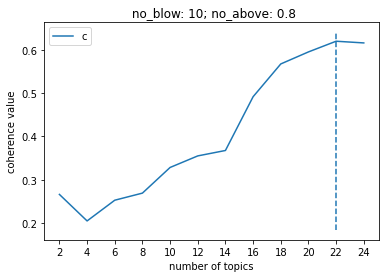

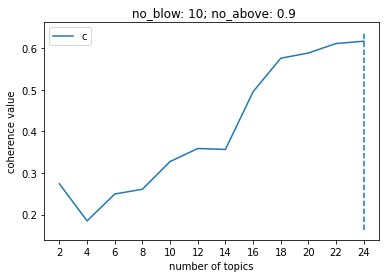

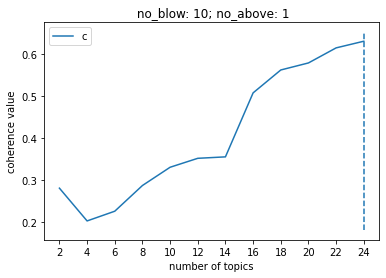

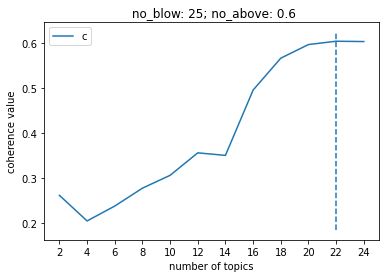

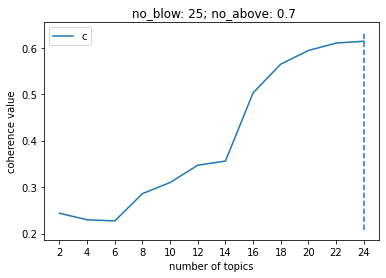

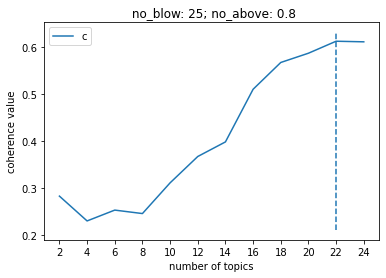

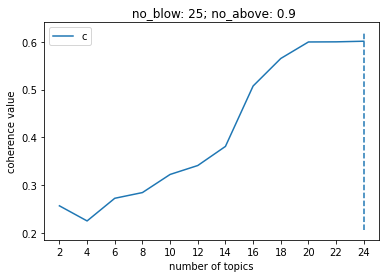

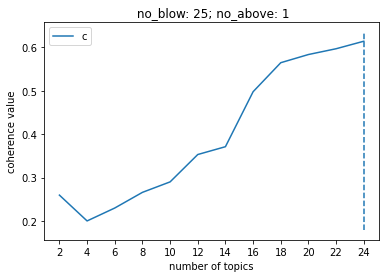

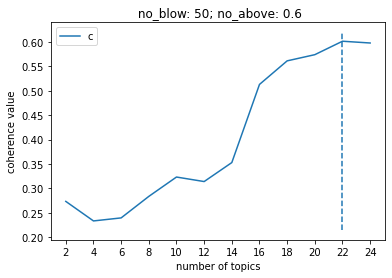

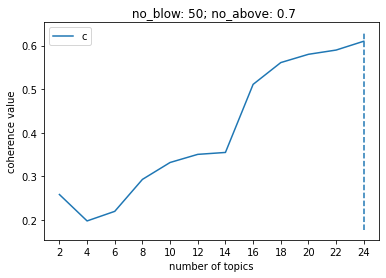

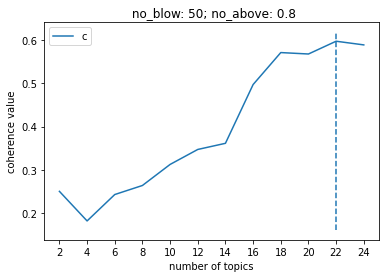

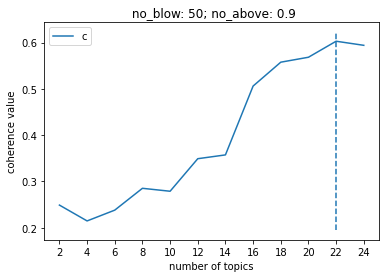

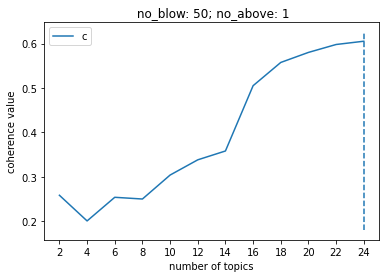

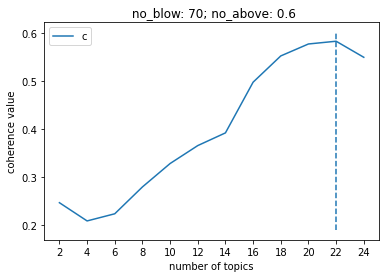

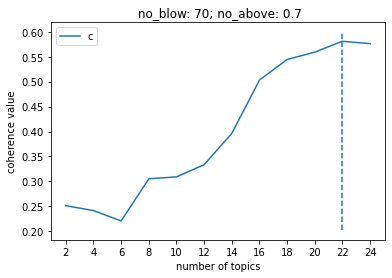

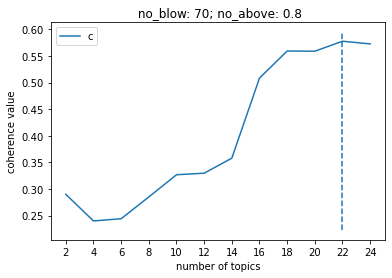

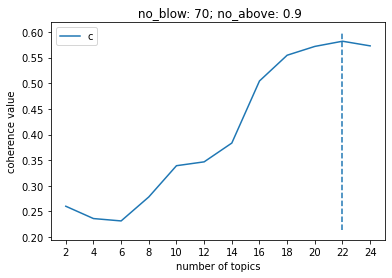

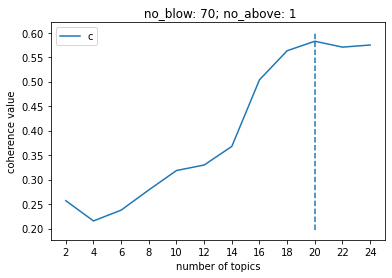

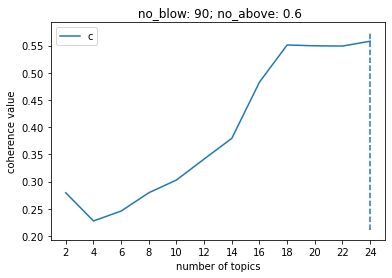

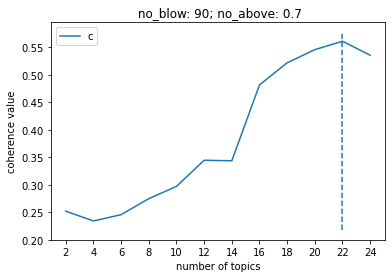

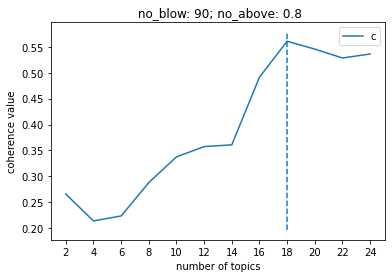

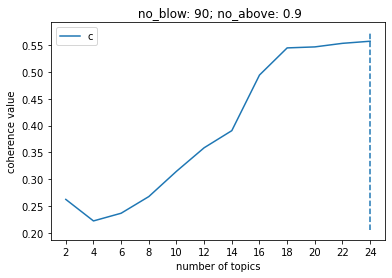

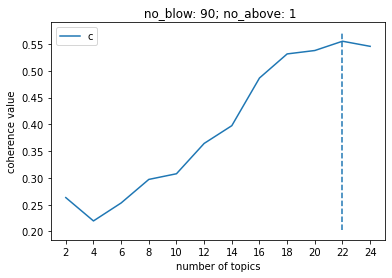

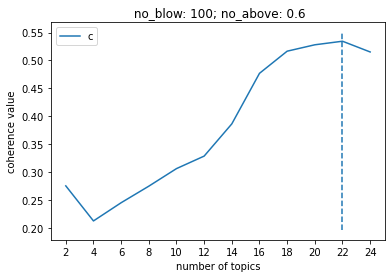

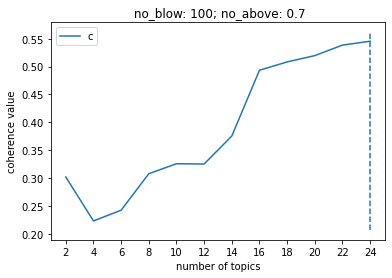

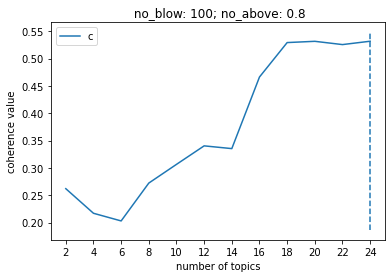

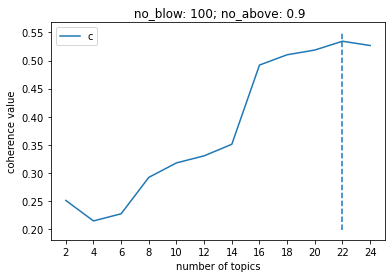

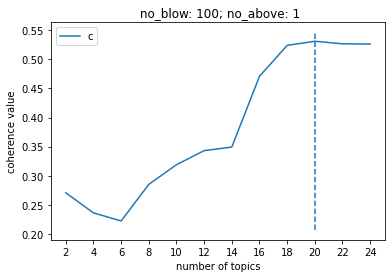

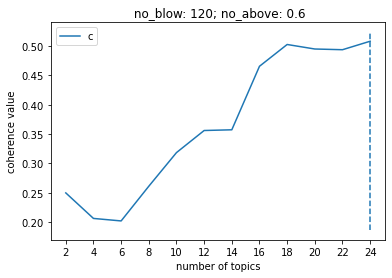

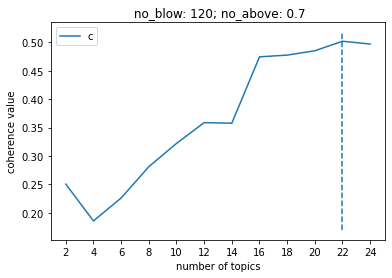

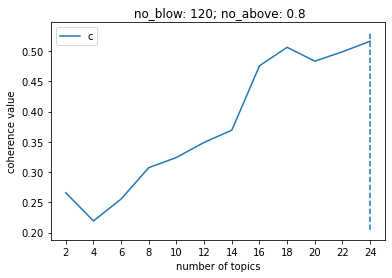

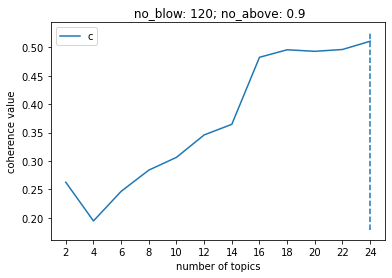

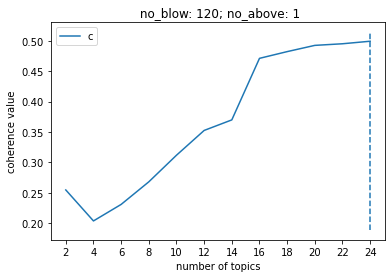

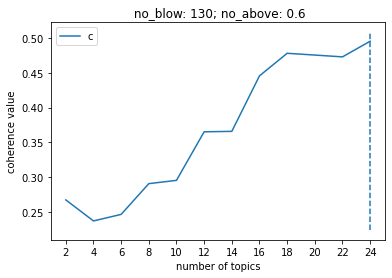

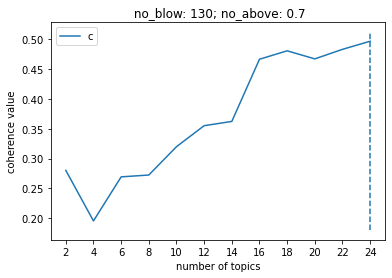

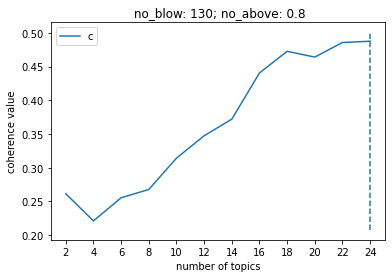

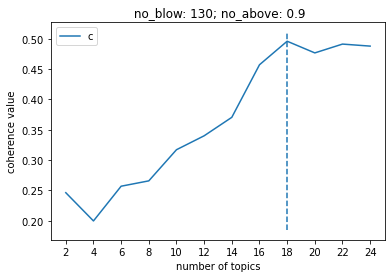

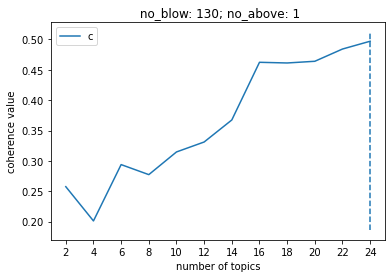

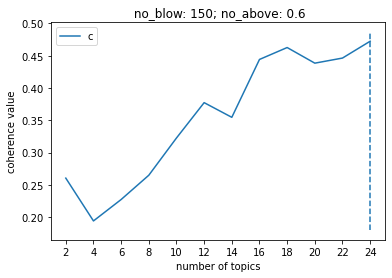

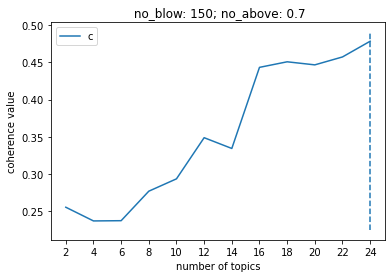

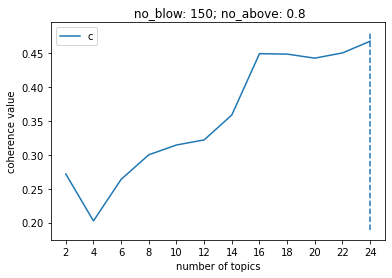

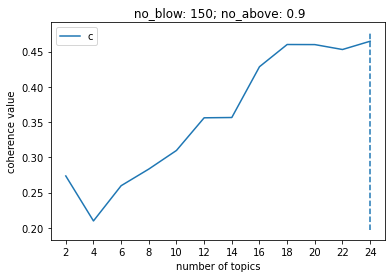

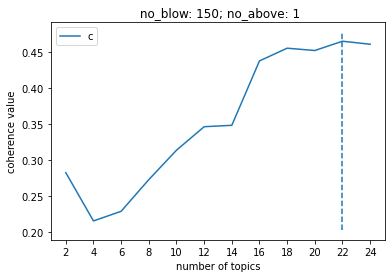

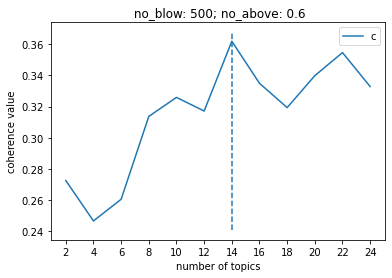

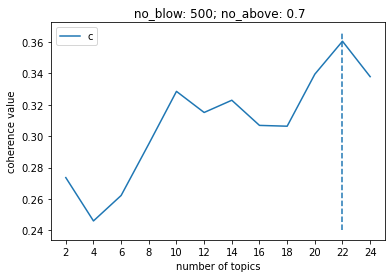

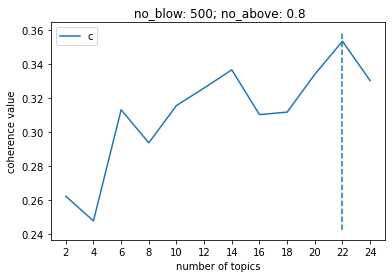

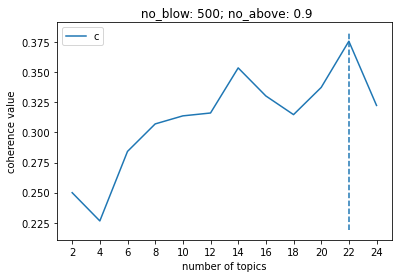

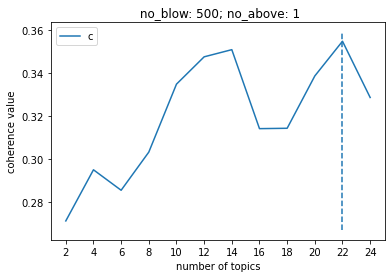

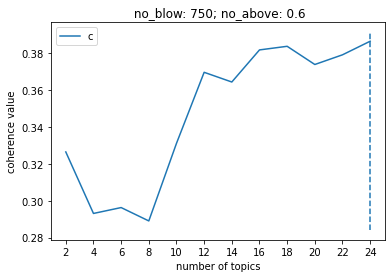

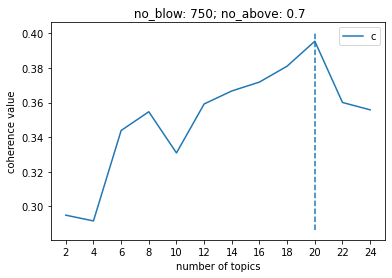

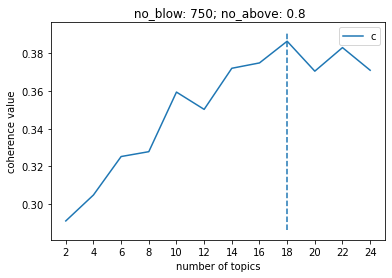

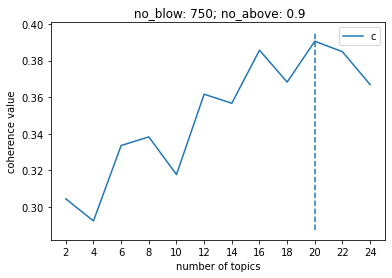

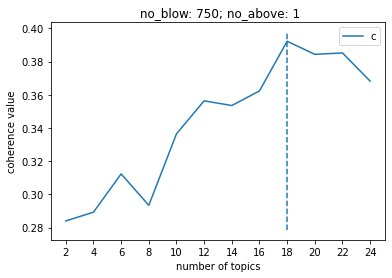

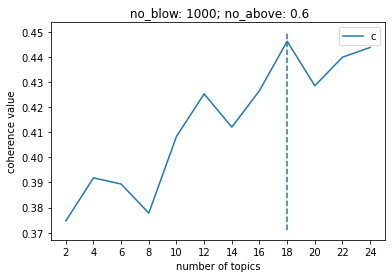

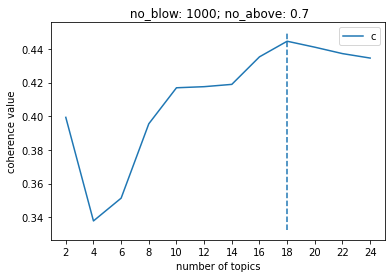

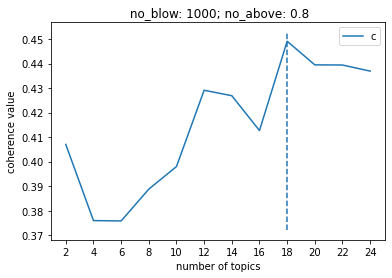

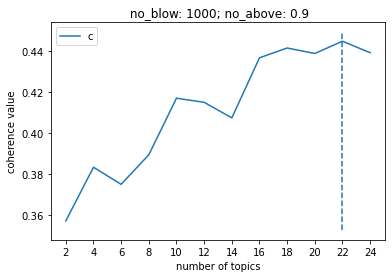

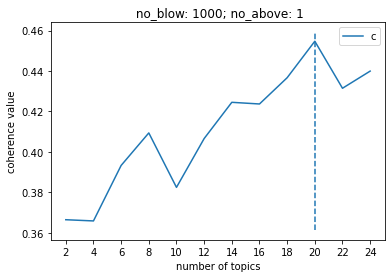

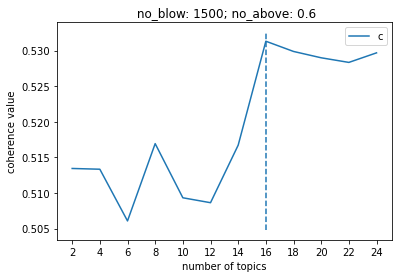

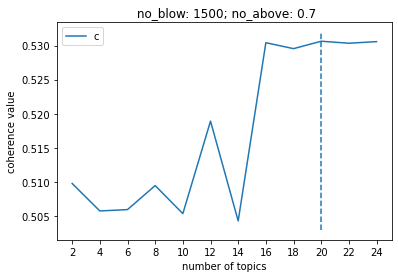

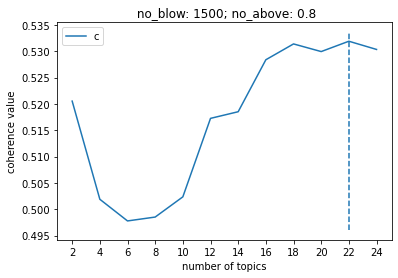

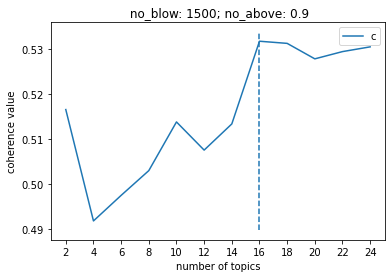

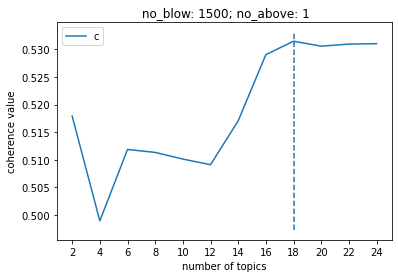

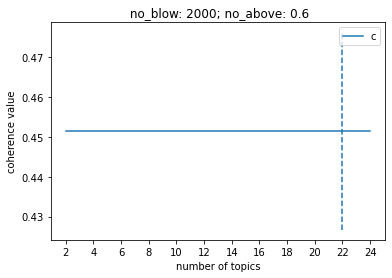

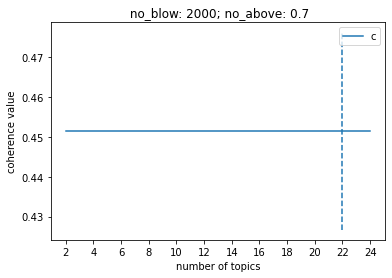

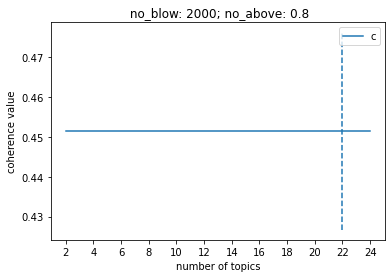

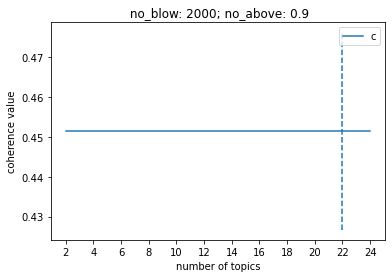

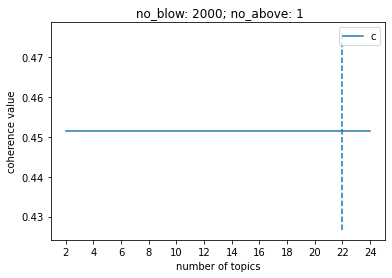

In [98]:
# loop the set of "no_below" and "no_above"
for below in no_below:
    for above in no_above:
        id2word,corpus=filter_words(below,above)
        model_list_LDA,coherence_values=compute_coherence(corpus=corpus,dictionary=id2word, texts=texts, start=start, limit=limit, step=step)
        max_coherence_idx = np.argmax(coherence_values)  # find the index of the model with highest coherence
        best_model = model_list_LDA[max_coherence_idx]  # get the model with highest coherence
        best_para[(below, above)] = best_model  # store the best model in the dictionary
        plot_num_topic(start,limit,step,coherence_values,below,above)

After perform the experiment, we find that when removing words no_below reached 2000, most of terms are removed, so there are not any fluctuation coherence score.when no_below range 5 to 90 , the optimal coherence scores are mostly over 0.55, and no_above ranges from 0.6 to 1 does not make significant influence to the optimal score. With regard to no_below is set to 70 getting the steer graph and the optimal score is also high, so no_below=70 is selected. In addition, we have remove the mots common words in preprocessing and the no_above is less different when choosing various values. Thus, no_above=1 is selected.

### Detect the optimal number of topics using  coherence value

In [21]:
#after performing the tests of "no_below" and "no_above", have selected the certain parameters
# create dictionary
id2word=corpora.Dictionary(df_pre_tm['tweet_nlp'])
#Filter out words that occur in less than 70 documents will be removed. 
id2word.filter_extremes(no_below=70, no_above=1) 
# create corpus
corpus=[id2word.doc2bow(text) for text in df_pre_tm['tweet_nlp']] 

# compute the coherence value
def compute_coherence(corpus,dictionary,texts,start,limit,step):
    coherence_values=[]
    model_list=[]
    for num_topics in range(start, limit, step):
        #print('Calculating for',num_topics,'topics')
        model=LdaModel(corpus=corpus,num_topics=num_topics,id2word=dictionary,iterations=200)
        model_list.append(model)
        coherence=CoherenceModel(model=model,dictionary=dictionary,texts=texts,coherence='c_v')
        coherence_values.append(coherence.get_coherence())
    return model_list,coherence_values


#plot the coherence value, visualization
def plot_num_topic_LDA(start,limit,step,coherence_values):
    x=range(start,limit,step)
    plt.plot(x,coherence_values)
    plt.xlabel('number of topics')
    plt.ylabel('coherence value')
    plt.legend(('coherence_values'),loc='best')
    plt.title('LDA model')
    #plt.vlines(x[np.argmax(coherence_values)], plt.ylim()[0], plt.ylim()[1],linestyles='dashed')
    plt.xticks(x)  # This line sets the x-axis ticks to the values of 'x'
    plt.show()
    


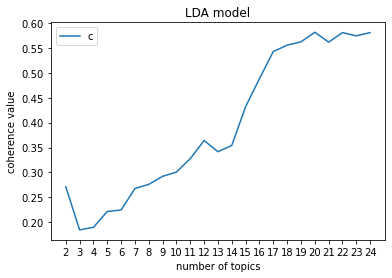

In [22]:
#create the text,each time you run, it may indicate different optimal number of topics ,so must repetition several times
texts=df_pre_tm['tweet_nlp']
# set the loop , range 2 to 25
start = 2
limit = 25
step = 1
# Finding best number of topics,use coherence to find the best
# executed coherence function and initialize the number of topics starta at 2 to 25, each step is 1
model_list_LDA,coherence_values=compute_coherence(corpus=corpus,dictionary=id2word,texts=texts,start=start,limit=limit,step=step)
plot_num_topic_LDA(start=start,limit=limit,step=step,coherence_values=coherence_values)
# since LDA is a probabilistic model, so it is not a deterministic ,
#but a stochastic (i.e., randomized) algorithm. This means that each time you run it,  it could potentially yield different results

In [23]:
# getting the exact coherence value of each number of topics
x=range(start,limit,step)
#list the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))    
# reslut shows 19 give the optimal coherence and interpretability

Num Topics = 2  has Coherence Value of 0.2712
Num Topics = 3  has Coherence Value of 0.1847
Num Topics = 4  has Coherence Value of 0.19
Num Topics = 5  has Coherence Value of 0.2216
Num Topics = 6  has Coherence Value of 0.2247
Num Topics = 7  has Coherence Value of 0.2678
Num Topics = 8  has Coherence Value of 0.2761
Num Topics = 9  has Coherence Value of 0.2922
Num Topics = 10  has Coherence Value of 0.3008
Num Topics = 11  has Coherence Value of 0.3279
Num Topics = 12  has Coherence Value of 0.3641
Num Topics = 13  has Coherence Value of 0.3416
Num Topics = 14  has Coherence Value of 0.3544
Num Topics = 15  has Coherence Value of 0.4322
Num Topics = 16  has Coherence Value of 0.4883
Num Topics = 17  has Coherence Value of 0.5427
Num Topics = 18  has Coherence Value of 0.5555
Num Topics = 19  has Coherence Value of 0.5621
Num Topics = 20  has Coherence Value of 0.5814
Num Topics = 21  has Coherence Value of 0.5615
Num Topics = 22  has Coherence Value of 0.5807
Num Topics = 23  has Co

### detecting the optimal iterations

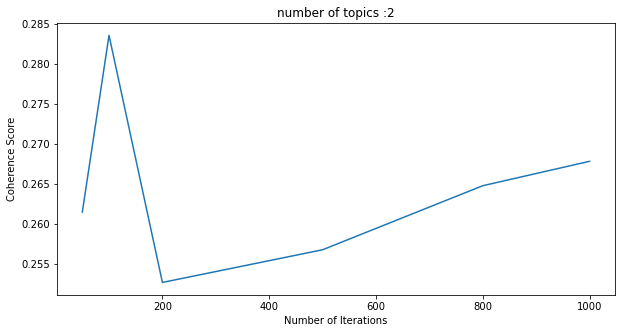

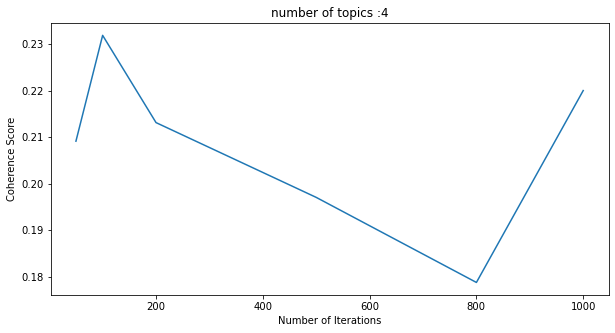

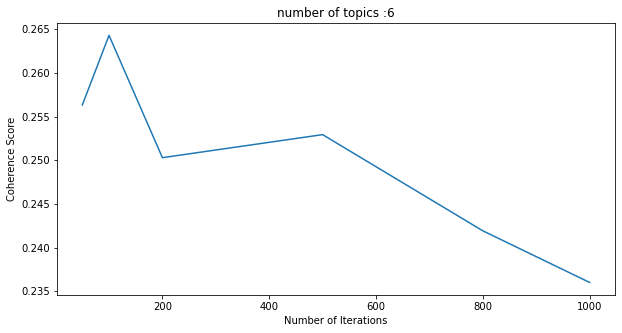

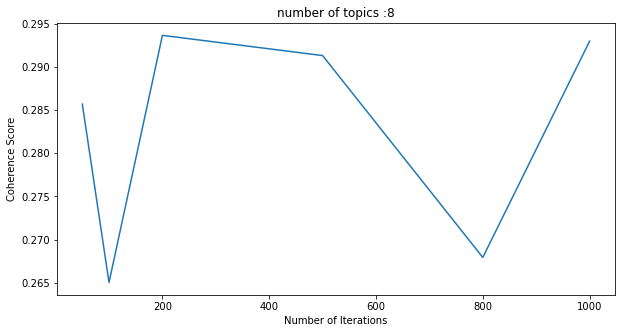

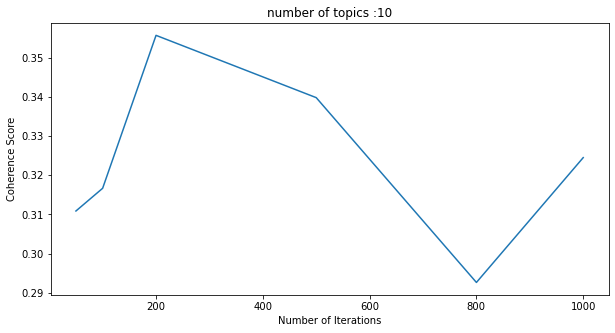

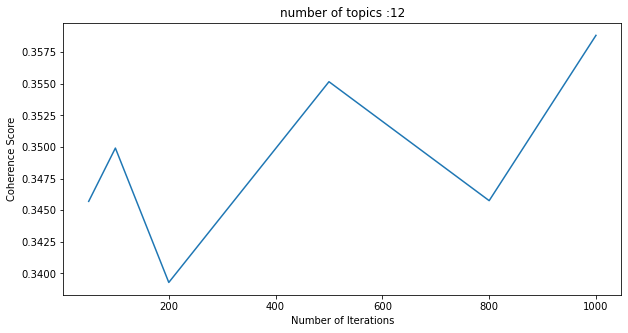

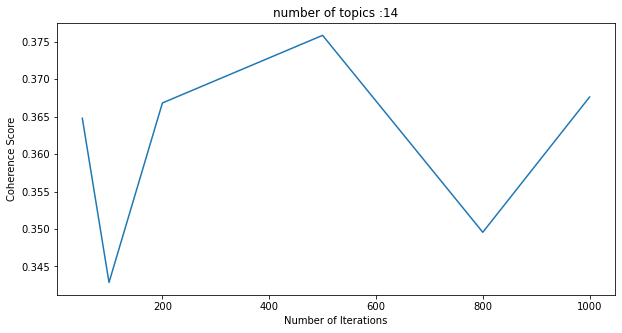

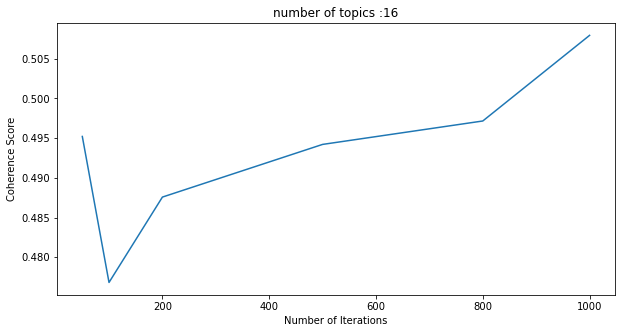

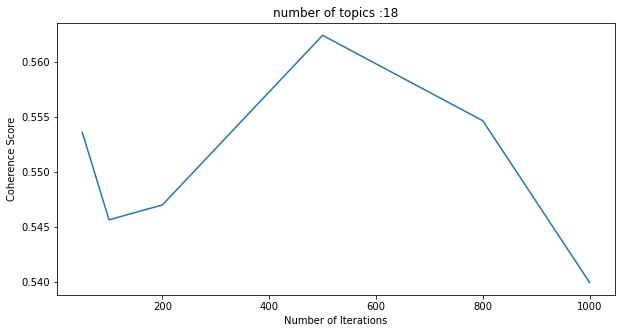

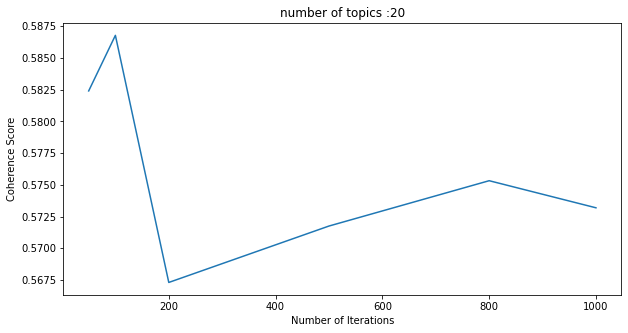

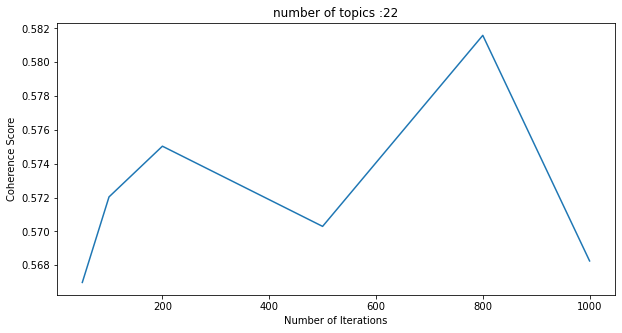

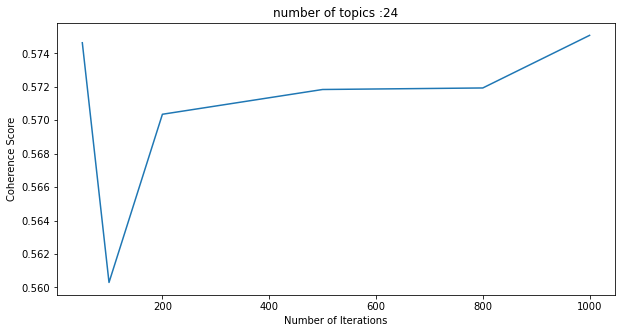

In [24]:
# testing the number of optimal iterations
iterations = [50, 100, 200,500,800, 1000]
num_topics = range(2,25,2) 

for num_topics in num_topics:
    scores = []
    for iteration in iterations:
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=iteration)
        coherence_model = CoherenceModel(model=model, texts=df_pre_tm['tweet_nlp'], dictionary=id2word, coherence='c_v')
        coherence = coherence_model.get_coherence()
        scores.append(coherence)

    # Plot the results
    plt.figure(figsize=(10,5))
    plt.plot(iterations, scores)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Coherence Score")
    plt.title(f'number of topics :{num_topics}')
    plt.show()

# since LDA is a probabilistic model, each time runs geetting different outcome
# in this study, trying many times ,
# the result shows about 200 iterations seems number of topics(ranging from 2 to 25) geting the optimal coherence score. so 200 iterations has been selected

### After finding the optimal number of topics and iterations , print the top n words and visualize

In [25]:
# please note in the next section CTM model also use this function, so have to perform these functions before visualizing CTM model

# depict wordcloud of top n words per topic
def word_topic_wordcloud(topics):
    # Calculate required number of rows for the plot
    rows = math.ceil(len(topics) / 3)
    # Create a subplot with 3 columns
    fig, axs = plt.subplots(rows, 3, figsize=(15, 5*rows))
    # Flatten axes for easy iteration
    axs = axs.flatten()

    # Loop over each topic
    for i, topic in enumerate(topics):
        # Extract words and their probabilities
        words = {}
        for word, probability in topic:
            words[word] = probability

        # Create wordcloud
        wordcloud = WordCloud(width=800, height=400, background_color='#fff').generate_from_frequencies(words)

        # Display the generated image:
        axs[i].imshow(wordcloud, interpolation='bilinear')
        axs[i].axis("off")
        axs[i].set_title(f"Topic {i+1}",fontsize=20)

    # Remove empty subplots
    for i in range(len(topics), len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()
    # Return the figure
    return fig
       
# save top n word per topic to DataFrame
def word_topic_dataframe(topics):
    data = []
    # Loop over each topic
    for topic_num, topic in enumerate(topics):
        for word, probability in topic:
            # Save each word, its probability, and its topic number to the DataFrame
            data.append({'topic_num': topic_num+1, 'word': word, 'probability': probability})
    return data

# retrieve the words and probability per topic
def parse_topic_string(topic_string):
    # Initialize list to hold word-probability tuples
    topic = []

    # Split string into word-probability parts
    for word_prob in topic_string.split(" + "):
        # Split word-probability part into word and probability
        prob, word = word_prob.split("*")
        
        # Remove quotes around word
        word = word.strip('"')
        
        # Convert probability from string to float
        prob = float(prob)
        
        # Append word-probability tuple to topic
        topic.append((word, prob))
        
    return topic


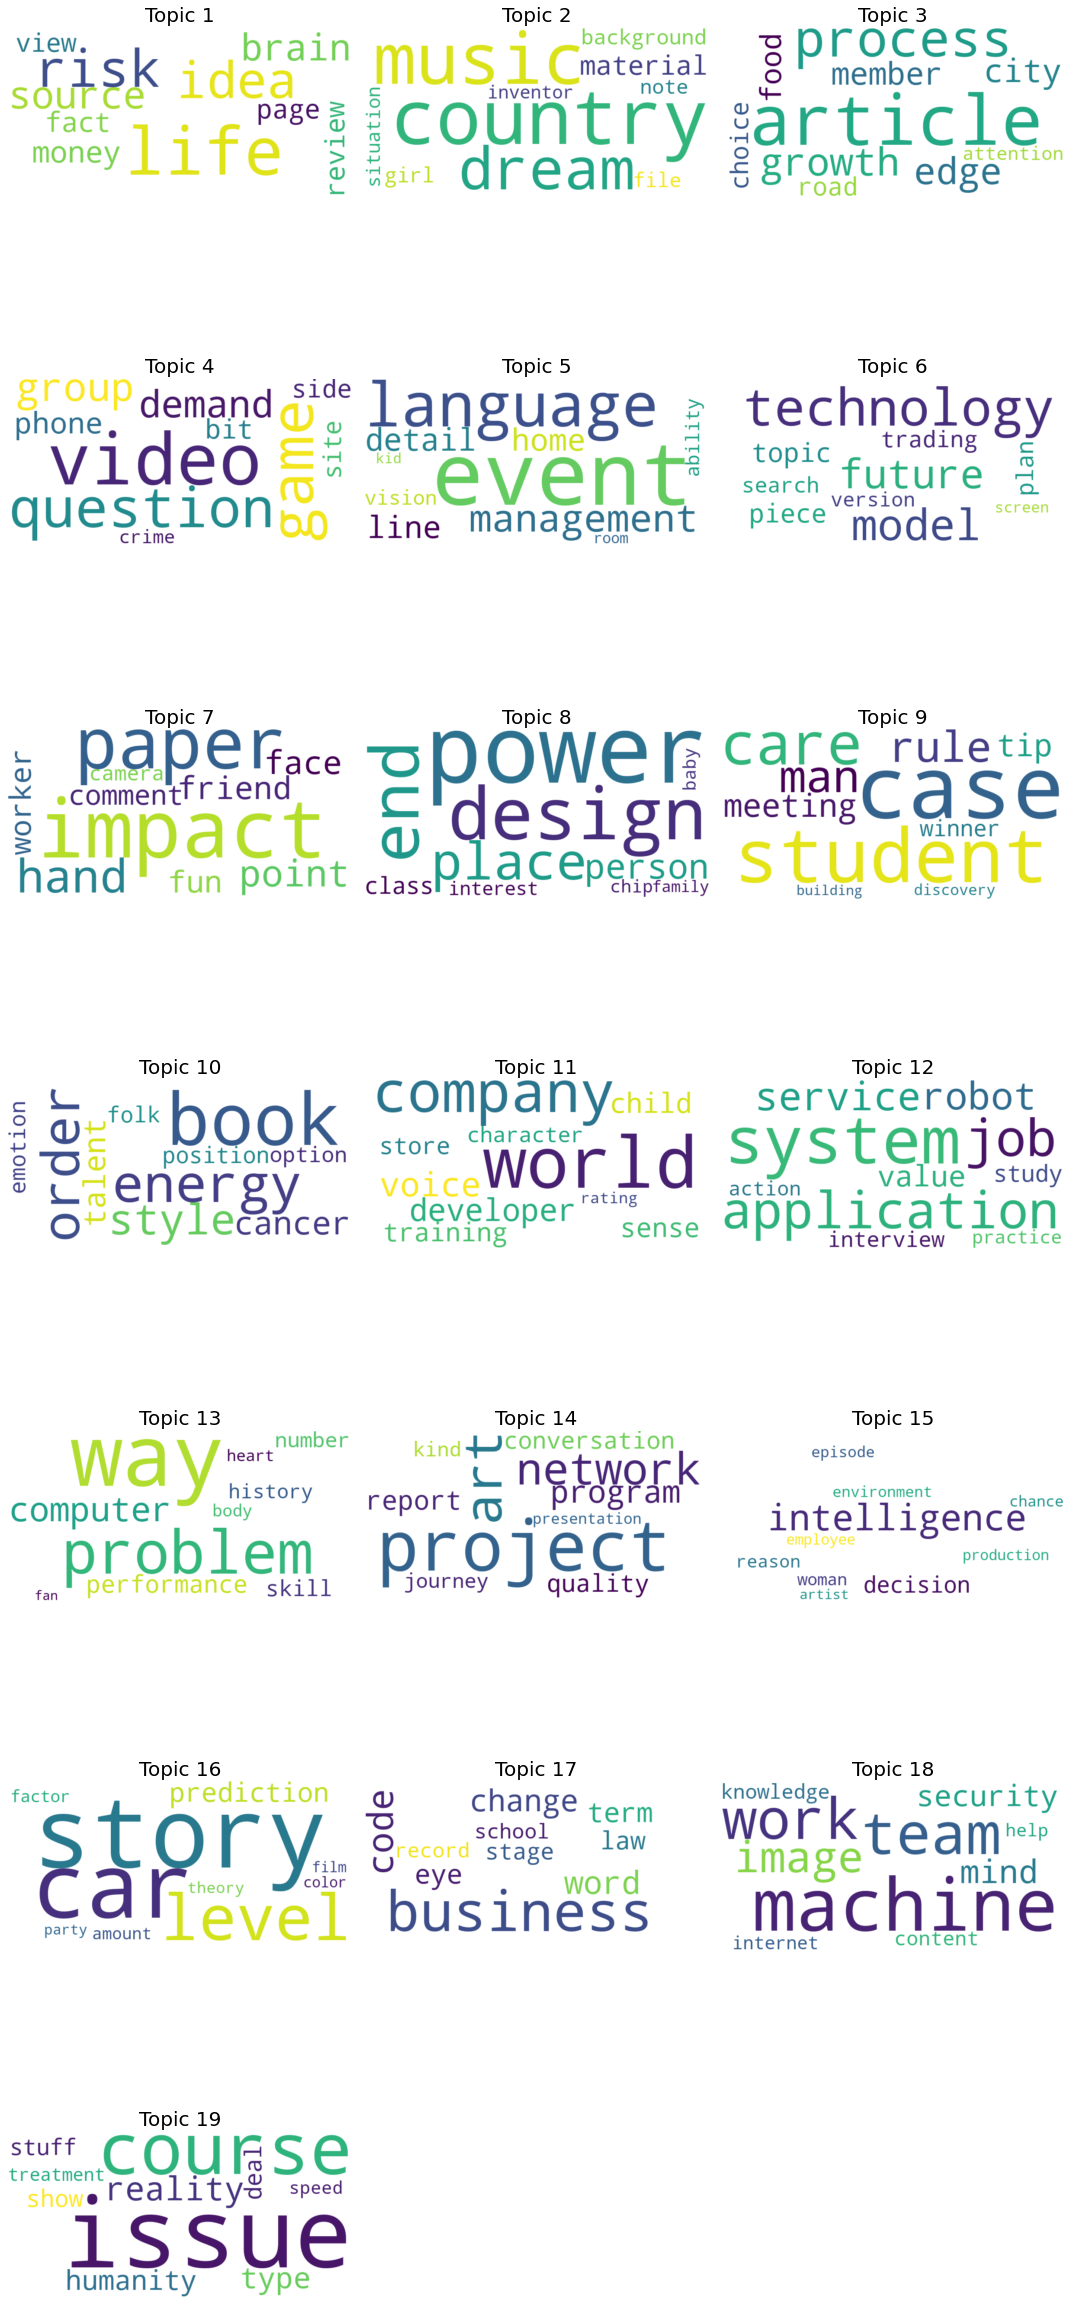

In [26]:
# Select the optimal number of topics model and print the topics
#in this study, the number of topics k=19, which is the 17th order in the "model_list_LDA" variable
LDA_optimal_model = model_list_LDA[17]
# # print the top 10 words of each topic
LDA_topics = LDA_optimal_model.show_topics(num_topics=LDA_optimal_model.num_topics,num_words=10)
# Apply parse_topic_string function to each topic
parsed_topics_LDA = [parse_topic_string(topic[1]) for topic in LDA_topics]

# depict the wordcloud and save it in file
LDA_wordcloud=word_topic_wordcloud(parsed_topics_LDA)
#LDA_wordcloud.savefig('dataprocess/LDA_wordcloud.png',dpi=300)

In [27]:
# save top words in dataframe
LDA_words=word_topic_dataframe(parsed_topics_LDA)
LDA_words_df = pd.DataFrame(LDA_words)
LDA_words_df
#save the dataframe to file
#LDA_words_df.to_csv("dataprocess/LDA_words.csv")

#also can save the model in file if u want
#LDA_optimal_model.save('dataprocess/lda_optimal_model.gensim')

topic_num       word  probability
0            1       life        0.164
1            1       risk        0.094
2            1       idea        0.089
3            1     source        0.086
4            1      brain        0.078
..         ...        ...          ...
185         19       show        0.048
186         19       deal        0.047
187         19      stuff        0.044
188         19  treatment        0.044
189         19      speed        0.042

[190 rows x 3 columns]

####  each topic average of proportionality

In [28]:
# Find the most probable topic for each tweet, and assign the topic label for tweets

# Get the topic distribution for each document (tweet)
topics_per_document_LDA = LDA_optimal_model.get_document_topics(corpus, minimum_probability=0)
# Find the most probable topic for each tweet
most_likely_topics_LDA = [max(topic_distribution, key=lambda x: x[1])[0] for topic_distribution in topics_per_document_LDA]
# Add the most probable topics to the DataFrame
df_LDA_tp_distri=df_pre_tm.copy()
df_LDA_tp_distri['topic'] = pd.Series(most_likely_topics_LDA)

# save topic distribution in file
#df_LDA_tp_distri.to_csv('dataprocess/LDA_TOPIC_DISTRIBUTION.csv')
#read the file
#df_LDA_tp_distri=pd.read_csv('dataprocess/LDA_TOPIC_DISTRIBUTION.csv')


In [29]:
#detect the prevalence of each topic on average in the documents
LDA_TOP_DIS=df_LDA_tp_distri.groupby('topic', as_index=False).agg(amount=('id','count'))
# we set the topic started label with 1 insted of 0
LDA_TOP_DIS['topic']=LDA_TOP_DIS['topic']+1
#add a new column to save the proportionality of each topic 
LDA_TOP_DIS['percent']= ((LDA_TOP_DIS['amount'] / LDA_TOP_DIS['amount'].sum()) * 100).round(2)
LDA_TOP_DIS

topic  amount  percent
0       1   52828    33.19
1       2    4241     2.66
2       3    6030     3.79
3       4    6409     4.03
4       5    4989     3.13
5       6    6850     4.30
6       7    4493     2.82
7       8    5170     3.25
8       9    3959     2.49
9      10    3161     1.99
10     11    6586     4.14
11     12    8787     5.52
12     13    8760     5.50
13     14    4903     3.08
14     15    8008     5.03
15     16    4785     3.01
16     17    6024     3.78
17     18    8310     5.22
18     19    4862     3.05

In [30]:
# detect each year the proportionality of each topic
LDA_YY_DIS=df_LDA_tp_distri.copy()
# we set the topic started label with 1 insted of 0
LDA_YY_DIS['topic']=LDA_YY_DIS['topic']+1
LDA_YY_DIS['created_at']=pd.to_datetime(LDA_YY_DIS['created_at'])
LDA_YY_DIS['year']=LDA_YY_DIS['created_at'].dt.year
LDA_YEAR_PRO=LDA_YY_DIS.groupby(['year','topic'],as_index=False).agg(amount=('id','count'))
LDA_YEAR_PRO['total']=LDA_YEAR_PRO.groupby('year')['amount'].transform('sum')
# calculate each year, each sentiment classification percentage
LDA_YEAR_PRO['percentage']=((LDA_YEAR_PRO['amount']/LDA_YEAR_PRO['total'])*100).round(2)
LDA_YEAR_PRO

year  topic  amount  total  percentage
0    2010      1    4849  15065       32.19
1    2010      2     817  15065        5.42
2    2010      3     926  15065        6.15
3    2010      4     550  15065        3.65
4    2010      5     683  15065        4.53
..    ...    ...     ...    ...         ...
242  2022     15     240   5211        4.61
243  2022     16     128   5211        2.46
244  2022     17     187   5211        3.59
245  2022     18     344   5211        6.60
246  2022     19     125   5211        2.40

[247 rows x 5 columns]

D:\16. Angaconda\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
D:\16. Angaconda\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


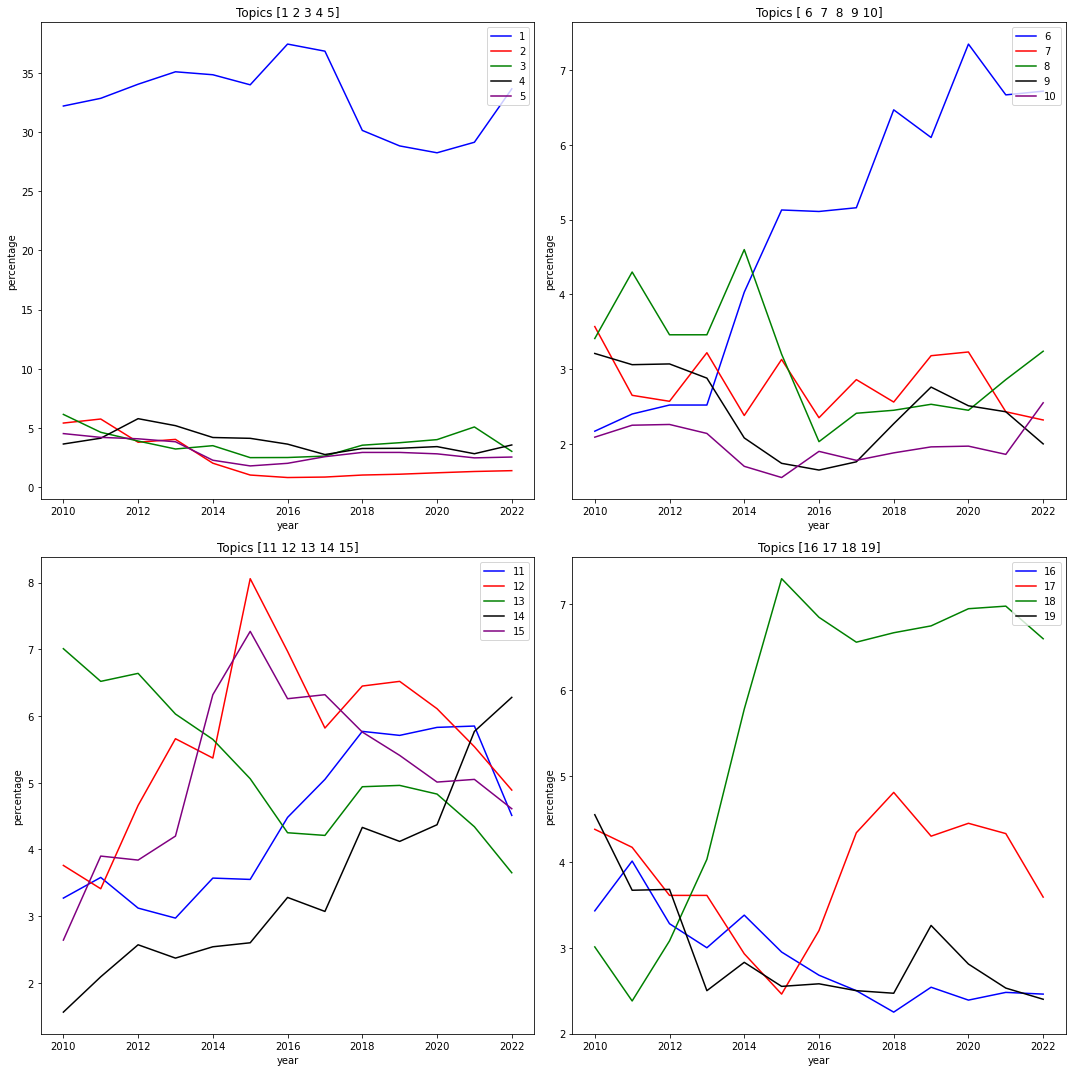

In [31]:
# visualization the proportionality of each topic with time series

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique topics
topics = LDA_YEAR_PRO['topic'].unique()

# Define the number of plots per row and column
plots_per_row = 2
plots_per_column = int(np.ceil(len(topics) / 5.0 / plots_per_row))
# Define a palette with a list of contrasting colors
palette = ['blue', 'red', 'green', 'black', 'purple']
# Create a figure and axes for subplots
fig, axes = plt.subplots(plots_per_column, plots_per_row, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    # Get the topics for this subplot
    subplot_topics = topics[i*5:(i+1)*5]

    # Filter the data for these topics
    subplot_data = LDA_YEAR_PRO[LDA_YEAR_PRO['topic'].isin(subplot_topics)]
    
    # Skip empty plots
    if subplot_data.empty:
        continue

        
        
    # Create a color palette dictionary for the subplot
    subplot_palette = dict(zip(subplot_topics, palette))
    # Create the subplot with the defined palette
    sns.lineplot(x='year', y='percentage', hue='topic', data=subplot_data, ax=ax, palette=subplot_palette)
    # Set the title
    ax.set_title('Topics {}'.format(''.join(str(subplot_topics))))
    # Move the legend to outside of the plot on the upper left
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()


In [62]:
# Visualization using LDAvis tool(optional)
# Visualize the topics
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(LDA_optimal_model, corpus, id2word)
# pyLDAvis.save_html(vis, 'dataprocess/lda_visualization.html') #save the figure
# vis

## Correlated topic modeling(CTM)

In [68]:
# need to install the package if your computer not installed already
# more detail can be seen through url=https://bab2min.github.io/tomotopy/v/en/;
#Lee, M. (2022). Tomotopy: 0.12.3 [Computer software]. Zenodo. https://doi.org/10.5281/zenodo.6868418, Retrieved from https://github.com/bab2min/tomotopy/tree/main
#!pip install tomotopy

# import the tomotopy package
import tomotopy as tp
import pandas as pd
import numpy as np
# using Gensim package LDA model for topic modeling
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel,CoherenceModel
import matplotlib.pyplot as plt

In [69]:
# Instantiate Corpus object
corpus_ctm = tp.utils.Corpus()
#create corpus for Correlated topic model
for words in df_pre_tm['tweet_nlp']:
    corpus_ctm.add_doc(words)

### detecting the optimal paremeter min_df and rm_top(optional)

In order to corresponding to LDA setting parameter, so min_df=70, rm_top=0 is set in CTMmodel, which indicates terms appear less than 70 times in document collections will be removed, and no top most common tokens will be removed.
min_df:minimum document frequency of words. Words with a smaller document frequency than min_df are excluded from the model.
rm_top:the number of top words to be removed. the value is 0, which means no top words are removed.
Package tomotopy, Retrieved from https://bab2min.github.io/tomotopy/v/en/#tomotopy.CTModel

In [67]:
# find the optimal parameter of CTM
#since we have set the parameters same as LDA model, so it will not perform this section. this section will perform a several days
start=2
limit=25
step=2
# remove tokens appears less than threshold value in all documents
min_df_list=[5,10,25,50,70,90,100,120,130,150,500,750,1000,1500,2000]
# remove tokens that are the top n based on their absolute frequency 
#the number of the most frequent words in documents that will be excluded from the topic modeling
rm_top_list=[20,50,70,90,100,120,150,180,200,500,750]
# initialize the variable to save models 
best_para_ctm={}
ll_per_word_dict = {}
def compute_coherence_ctm(start, limit,step,min_df,rm_top,corpus_ctm):
    coherence_values_ctm=[]
    model_list_ctm=[]
    for num_topics in range(start, limit, step):
         # Create a CTM model
        ctm_model = tp.CTModel(min_df=min_df, rm_top=rm_top,k=num_topics,corpus=corpus_ctm)
        # initializes the model, preparing it for training
        ctm_model.train(0)
        # A for loop is used to train the model for 50 iterations
        for i in range(0, 50, 2):
            ctm_model.train(2)
            ll_per_word_dict[(min_df, rm_top, i)] = ctm_model.ll_per_word

        model_list_ctm.append(ctm_model)
        #calculate the coherence score in CTM model
        coh = tp.coherence.Coherence(ctm_model, coherence='c_v')
        average_coherence_ctm = coh.get_score()
        coherence_values_ctm.append(average_coherence_ctm)
    return model_list_ctm,coherence_values_ctm  

#plot the coherence value
def plot_num_topic_ctm(start,limit,step,coherence_values_ctm,min_df,rm_top):
    x=range(start,limit,step)
    plt.plot(x,coherence_values_ctm)
    plt.xlabel('number of topics in CTM')
    plt.ylabel('coherence value in CTM')
    plt.title(f'CTM model min_df: {min_df} rm_top: {rm_top}')
    plt.legend(('coherence_values_ctm'),loc='best')
    plt.vlines(x[np.argmax(coherence_values_ctm)], plt.ylim()[0], plt.ylim()[1],linestyles='dashed')
    plt.xticks(x)  # This line sets the x-axis ticks to the values of 'x'
    plt.show()    
       

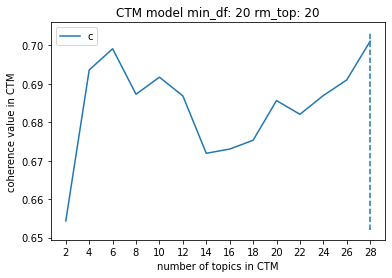

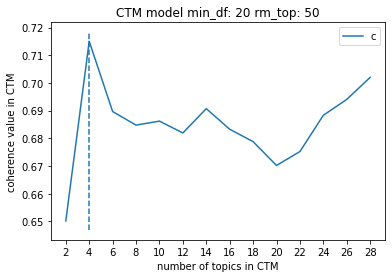

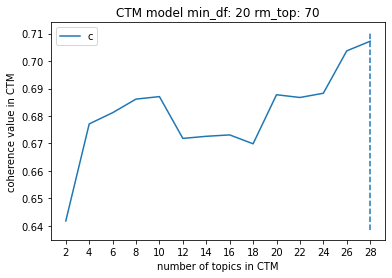

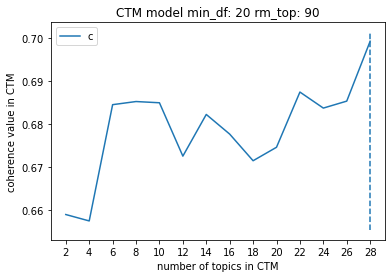

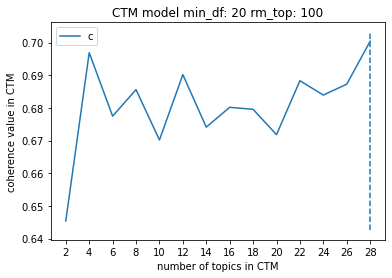

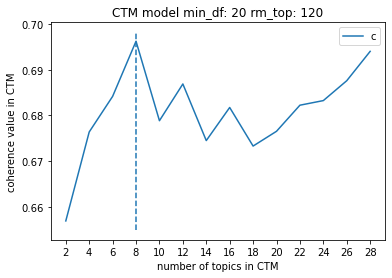

KeyboardInterrupt: 

In [132]:
for min_df in min_df_list:
    for rm_top in rm_top_list:
        model_list_ctm,coherence_values_ctm=compute_coherence_ctm(start=start, limit=limit, step=step,min_df=min_df,rm_top=min_df,corpus_ctm=corpus_ctm)
        max_coherence_idx_ctm = np.argmax(coherence_values_ctm)  # find the index of the model with highest coherence
        best_model_ctm = model_list_ctm[max_coherence_idx_ctm]  # get the model with highest coherence
        best_para_ctm[(min_df, rm_top)] = best_model_ctm  # store the best model in the dictionary
        plot_num_topic_ctm(start,limit,step,coherence_values_ctm,min_df,rm_top)

### detect the optimal number of topis in CTM model

In [70]:
# plot the coherence value
def plot_num_topic_ctm_just(start,limit,step,coherence_values_ctm):
    x=range(start,limit,step)
    plt.plot(x,coherence_values_ctm)
    plt.xlabel('number of topics in CTM')
    plt.ylabel('coherence value in CTM')
    plt.legend(('coherence_values_ctm'),loc='best')
    plt.title('CTM model')
    plt.xticks(x)  # This line sets the x-axis ticks to the values of 'x'
    plt.show() 
# compute the coherence value in CTM model   
def compute_coherence_ctm(start, limit,step,min_df,rm_top,corpus_ctm):
    coherence_values_ctm=[]
    model_list_ctm=[]
    for num_topics in range(start, limit, step):
         # Create a CTM model
        ctm_model = tp.CTModel(min_df=min_df, rm_top=rm_top,k=num_topics,corpus=corpus_ctm)
        # initializes the model, preparing it for training
        ctm_model.train(0)
        # A for loop is used to train the model for 50 iterations
        for i in range(0, 50, 2):
            ctm_model.train(2)
        model_list_ctm.append(ctm_model)
        #calculate the coherence score in CTM model
        coh = tp.coherence.Coherence(ctm_model, coherence='c_v')
        average_coherence_ctm = coh.get_score()
        coherence_values_ctm.append(average_coherence_ctm)
    return model_list_ctm,coherence_values_ctm         

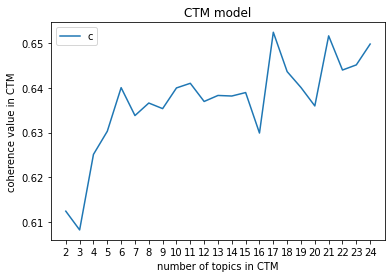

In [71]:
# detect the optimal number of topics in CTMmodel
min_df=70
rm_top=0
#loop the number of topics, from 2 to 25
start=2
limit=25
step=1

model_list_ctm,coherence_values_ctm=compute_coherence_ctm(start=start, limit=limit, step=step,min_df=min_df,rm_top=rm_top,corpus_ctm=corpus_ctm)
plot_num_topic_ctm_just(start=start, limit=limit, step=step,coherence_values_ctm=coherence_values_ctm)
# since CTM is a probabilistic model, so it is not a deterministic ,
#but a stochastic (i.e., randomized) algorithm. This means that each time you run it,  it could potentially yield different results


In [72]:
# getting the exact coherence value of each number of topics
#list the coherence scores
x=range(start,limit,step)
for m, cv in zip(x, coherence_values_ctm):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# reslut shows 10-20 give the higher coherence

Num Topics = 2  has Coherence Value of 0.6124
Num Topics = 3  has Coherence Value of 0.6082
Num Topics = 4  has Coherence Value of 0.6251
Num Topics = 5  has Coherence Value of 0.6303
Num Topics = 6  has Coherence Value of 0.6401
Num Topics = 7  has Coherence Value of 0.6338
Num Topics = 8  has Coherence Value of 0.6366
Num Topics = 9  has Coherence Value of 0.6354
Num Topics = 10  has Coherence Value of 0.64
Num Topics = 11  has Coherence Value of 0.6411
Num Topics = 12  has Coherence Value of 0.637
Num Topics = 13  has Coherence Value of 0.6383
Num Topics = 14  has Coherence Value of 0.6382
Num Topics = 15  has Coherence Value of 0.639
Num Topics = 16  has Coherence Value of 0.6299
Num Topics = 17  has Coherence Value of 0.6525
Num Topics = 18  has Coherence Value of 0.6437
Num Topics = 19  has Coherence Value of 0.6401
Num Topics = 20  has Coherence Value of 0.636
Num Topics = 21  has Coherence Value of 0.6517
Num Topics = 22  has Coherence Value of 0.644
Num Topics = 23  has Cohere

### detecting the optimal train iterations in CTM

In [73]:
# detect the optimal number of iterations
#number of topics in CTM
num_topic_CTM=range(2,25,2)
for k in num_topic_CTM:
    model = tp.CTModel(min_df=70, rm_top=0,k=k,corpus=corpus_ctm)
    # initializes the model, preparing it for training
    model.train(0)
    # A for loop is used to train the model for 100 iterations
    print(f'calculate for k={k} topics : \n' )
    for i in range(0, 100, 2):
        print(f'Iteration:{i:04},LL per word:{model.ll_per_word:.4f}')
        model.train(2)
    print('Iteration: {:04}, LL per word: {:.4}'.format(100, model.ll_per_word))

# when the value of ll_per_word reached the optimal value and remain stable means the itearation is optimal
#the result shows iteration around 50 is optimal for  number of topics ranging from 2 to 25 in CTM model

calculate for k=2 topics : 

Iteration:0000,LL per word:-7.8823
Iteration:0002,LL per word:-7.9243
Iteration:0004,LL per word:-7.9687
Iteration:0006,LL per word:-8.0314
Iteration:0008,LL per word:-8.1034
Iteration:0010,LL per word:-8.1799
Iteration:0012,LL per word:-8.2520
Iteration:0014,LL per word:-8.3241
Iteration:0016,LL per word:-8.3887
Iteration:0018,LL per word:-8.4592
Iteration:0020,LL per word:-8.5353
Iteration:0022,LL per word:-8.6111
Iteration:0024,LL per word:-8.6936
Iteration:0026,LL per word:-8.7877
Iteration:0028,LL per word:-8.8864
Iteration:0030,LL per word:-8.9966
Iteration:0032,LL per word:-9.1174
Iteration:0034,LL per word:-9.2379
Iteration:0036,LL per word:-9.3667
Iteration:0038,LL per word:-9.5058
Iteration:0040,LL per word:-9.6448
Iteration:0042,LL per word:-9.7871
Iteration:0044,LL per word:-9.9442
Iteration:0046,LL per word:-10.0914
Iteration:0048,LL per word:-10.2426
Iteration:0050,LL per word:-10.4044
Iteration:0052,LL per word:-10.5703
Iteration:0054,LL per 

Iteration:0048,LL per word:-11.1480
Iteration:0050,LL per word:-11.2439
Iteration:0052,LL per word:-11.3362
Iteration:0054,LL per word:-11.4197
Iteration:0056,LL per word:-11.4921
Iteration:0058,LL per word:-11.5397
Iteration:0060,LL per word:-11.5671
Iteration:0062,LL per word:-11.5761
Iteration:0064,LL per word:-11.5820
Iteration:0066,LL per word:-11.5789
Iteration:0068,LL per word:-11.5703
Iteration:0070,LL per word:-11.5579
Iteration:0072,LL per word:-11.5426
Iteration:0074,LL per word:-11.5224
Iteration:0076,LL per word:-11.4959
Iteration:0078,LL per word:-11.4672
Iteration:0080,LL per word:-11.4335
Iteration:0082,LL per word:-11.3969
Iteration:0084,LL per word:-11.3539
Iteration:0086,LL per word:-11.3105
Iteration:0088,LL per word:-11.2650
Iteration:0090,LL per word:-11.2195
Iteration:0092,LL per word:-11.1740
Iteration:0094,LL per word:-11.1250
Iteration:0096,LL per word:-11.0774
Iteration:0098,LL per word:-11.0291
Iteration: 0100, LL per word: -10.98
calculate for k=12 topics :

Iteration:0090,LL per word:-14.9491
Iteration:0092,LL per word:-15.2291
Iteration:0094,LL per word:-15.4852
Iteration:0096,LL per word:-15.7175
Iteration:0098,LL per word:-15.9342
Iteration: 0100, LL per word: -16.14
calculate for k=20 topics : 

Iteration:0000,LL per word:-21.3733
Iteration:0002,LL per word:-22.0677
Iteration:0004,LL per word:-21.3291
Iteration:0006,LL per word:-20.6347
Iteration:0008,LL per word:-19.9782
Iteration:0010,LL per word:-19.3551
Iteration:0012,LL per word:-18.7443
Iteration:0014,LL per word:-18.1734
Iteration:0016,LL per word:-17.6306
Iteration:0018,LL per word:-17.1203
Iteration:0020,LL per word:-16.6529
Iteration:0022,LL per word:-16.2133
Iteration:0024,LL per word:-15.8169
Iteration:0026,LL per word:-15.4457
Iteration:0028,LL per word:-15.1082
Iteration:0030,LL per word:-14.7995
Iteration:0032,LL per word:-14.5183
Iteration:0034,LL per word:-14.2558
Iteration:0036,LL per word:-14.0053
Iteration:0038,LL per word:-13.7832
Iteration:0040,LL per word:-13.57

### Visulazation CTM

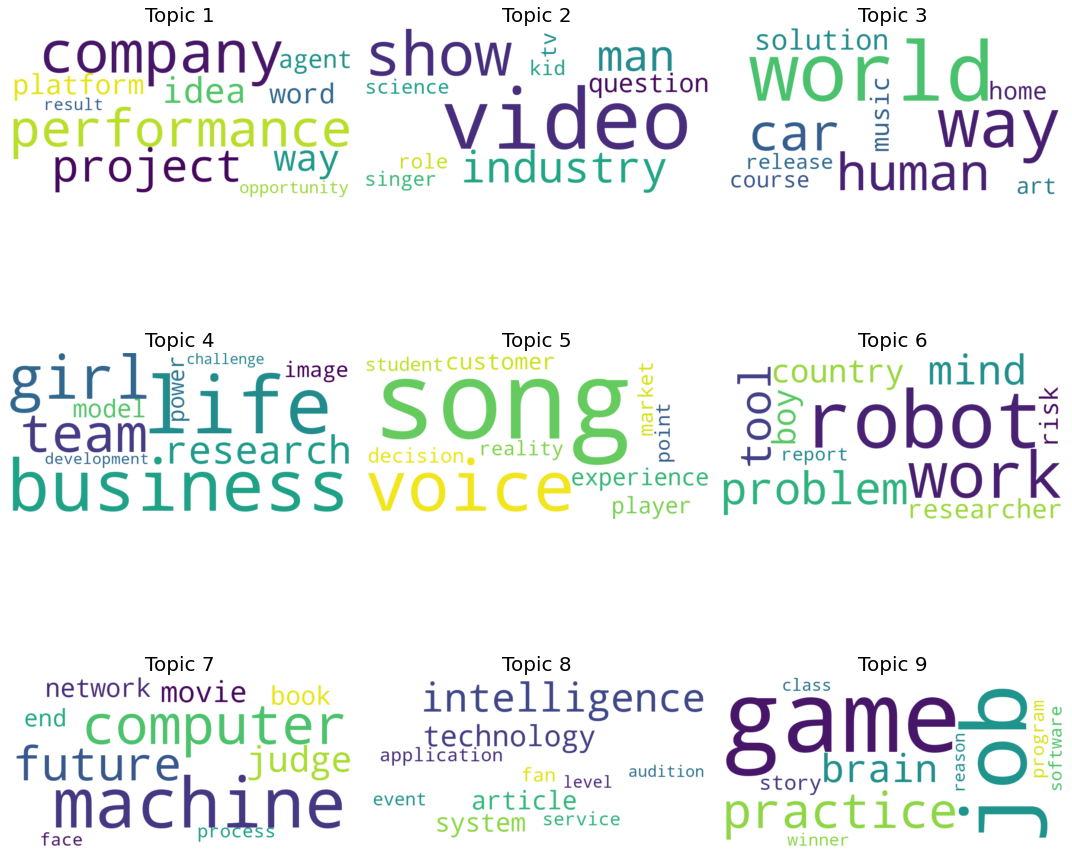

In [74]:
# if visualization these section , must perform the functions in the section: (3.1.4:  After finding the optimal number of topics and iterations , print the top n words and visualize")

# choose the optimal number of topic model, the optimal number of topics is 9, which is the 7th model in model_list_ctm variable
mdl=model_list_ctm[7]
CTM_topics = []
# Loop over each topic,getting top n words per topic
for k in range(mdl.k):
    # Get the top 10 words for this topic
    topic_words = mdl.get_topic_words(k, top_n=10)
    CTM_topics.append(topic_words)
    
# depict the Wordcloud for each topic
CTM_wordcloud=word_topic_wordcloud(CTM_topics)
#save the word cloud in file
#CTM_wordcloud.savefig('dataprocess/CTM_wordcloud.png',dpi=300)

In [76]:
# save the top n word per topic to DataFrame
CTM_words=word_topic_dataframe(CTM_topics)
CTM_words_df = pd.DataFrame(CTM_words)
CTM_words_df
#save the datafrme in file
#CTM_words_df.to_csv("dataprocess/CTM_words.csv")

topic_num         word  probability
0           1      company     0.060731
1           1  performance     0.053925
2           1      project     0.048882
3           1          way     0.030721
4           1         idea     0.027597
..        ...          ...          ...
85          9      program     0.027565
86          9     software     0.025459
87          9       winner     0.024002
88          9       reason     0.022803
89          9        class     0.022285

[90 rows x 3 columns]

In [77]:
# using Network library to visualize the CTMmodel, visualization the correlations between topics in CTM model
#Retrieved from https://github.com/bab2min/tomotopy/tree/main

from pyvis.network import Network
# visualize the result
g = Network(width=800, height=800, notebook=True)
correl = mdl.get_correlations().reshape([-1])
correl.sort()
#calculates the top tenth percentile of correlations
#get the value of the correlation corresponding to the top tenth percentile, find the most significant correlation over top tenth
top_tenth = mdl.k * (mdl.k - 1) // 10
top_tenth = correl[-mdl.k - top_tenth]
#initialize the list
edge_correlations = {}
for k in range(mdl.k):
    label = "#{}".format(k+1)
    title= ' '.join(word for word, _ in mdl.get_topic_words(k, top_n=10)) # print the top 10 words
    print('Topic', label, title)
    g.add_node(k+1, label=label, title=title, shape='ellipse')
    for l, correlation in zip(range(k), mdl.get_correlations(k)):
        if correlation < top_tenth: 
            continue
        g.add_edge(k+1, l+1, value=float(correlation), title='{:.02}'.format(correlation))
        #print the significant correlation score
        print(f'Edge {k}-{l} correlation: {correlation:.04f}')
        edge_correlations[(k+1,l+1)]=correlation

g.barnes_hut(gravity=-1000, spring_length=20)
g.show_buttons(filter_=['physics'])
g.show("dataprocess/CTM_topic_network.html")

Topic #1 company performance project way idea platform word agent opportunity result
Topic #2 video show industry man question tv role kid singer science
Topic #3 world way car human solution music home art course release
Edge 2-1 correlation: 0.1711
Topic #4 life business girl team research model power image development challenge
Edge 3-2 correlation: 0.1891
Topic #5 song voice experience customer player market decision point reality student
Edge 4-3 correlation: 0.1939
Topic #6 robot work problem tool mind country boy researcher risk report
Edge 5-4 correlation: 0.1512
Topic #7 machine computer future judge movie book network end process face
Topic #8 intelligence technology article system fan application service event level audition
Topic #9 game job practice brain story program software winner reason class
dataprocess/CTM_topic_network.html


In [78]:
print('correlation score',edge_correlations)

correlation score {(3, 2): 0.17112817, (4, 3): 0.18905675, (5, 4): 0.19393468, (6, 5): 0.15120773}


#### each topic  proportionality on average

In [79]:
# Get the topic distribution for each document (tweet)
topics_per_document_CTM = [doc.get_topic_dist() for doc in mdl.docs]

# Find the most probable topic for each tweet
most_likely_topics_CTM = [np.argmax(topic_distribution) for topic_distribution in topics_per_document_CTM]

# Then, you can add this list to your dataframe
df_CTM_tp_distri = df_pre_tm.copy()
df_CTM_tp_distri['topic'] = most_likely_topics_CTM
#save the dataframe in file
#df_CTM_tp_distri.to_csv('dataprocess/CTM_TOPIC_DISTRIBUTION.csv')
#Load the file
#df_CTM_tp_distri=pd.read_csv('dataprocess/CTM_TOPIC_DISTRIBUTION.csv')

In [80]:
# compute the average prevalence of each topic in document collections

CTM_TOP_DIS=df_CTM_tp_distri.groupby('topic', as_index=False).agg(amount=('id','count'))
# set the topic label start with 1 instead of 0
CTM_TOP_DIS['topic']=CTM_TOP_DIS['topic']+1
CTM_TOP_DIS['percent']= ((CTM_TOP_DIS['amount'] / CTM_TOP_DIS['amount'].sum()) * 100).round(2)

In [81]:
CTM_TOP_DIS

topic  amount  percent
0      1   45040    28.30
1      2   20609    12.95
2      3   18674    11.73
3      4   15344     9.64
4      5   14457     9.08
5      6   12430     7.81
6      7   11609     7.29
7      8   11057     6.95
8      9    9935     6.24

In [83]:
#detect each year of each topic average proportionality in the document collections

CTM_YY_DIS=df_CTM_tp_distri.copy()
# we set the topic started label with 1 insted of 0
CTM_YY_DIS['topic']=CTM_YY_DIS['topic']+1
# getting the year of tweets posted
CTM_YY_DIS['created_at']=pd.to_datetime(CTM_YY_DIS['created_at'])
CTM_YY_DIS['year']=CTM_YY_DIS['created_at'].dt.year

CTM_YEAR_PRO=CTM_YY_DIS.groupby(['year','topic'],as_index=False).agg(amount=('id','count'))
CTM_YEAR_PRO['total']=CTM_YEAR_PRO.groupby('year')['amount'].transform('sum')
# calculate each year, each topic percentage
CTM_YEAR_PRO['percentage']=((CTM_YEAR_PRO['amount']/CTM_YEAR_PRO['total'])*100).round(2)
CTM_YEAR_PRO

year  topic  amount  total  percentage
0    2010      1    4816  15065       31.97
1    2010      2    2332  15065       15.48
2    2010      3    1303  15065        8.65
3    2010      4    1316  15065        8.74
4    2010      5    1911  15065       12.69
..    ...    ...     ...    ...         ...
112  2022      5     336   5211        6.45
113  2022      6     367   5211        7.04
114  2022      7     287   5211        5.51
115  2022      8     418   5211        8.02
116  2022      9     272   5211        5.22

[117 rows x 5 columns]

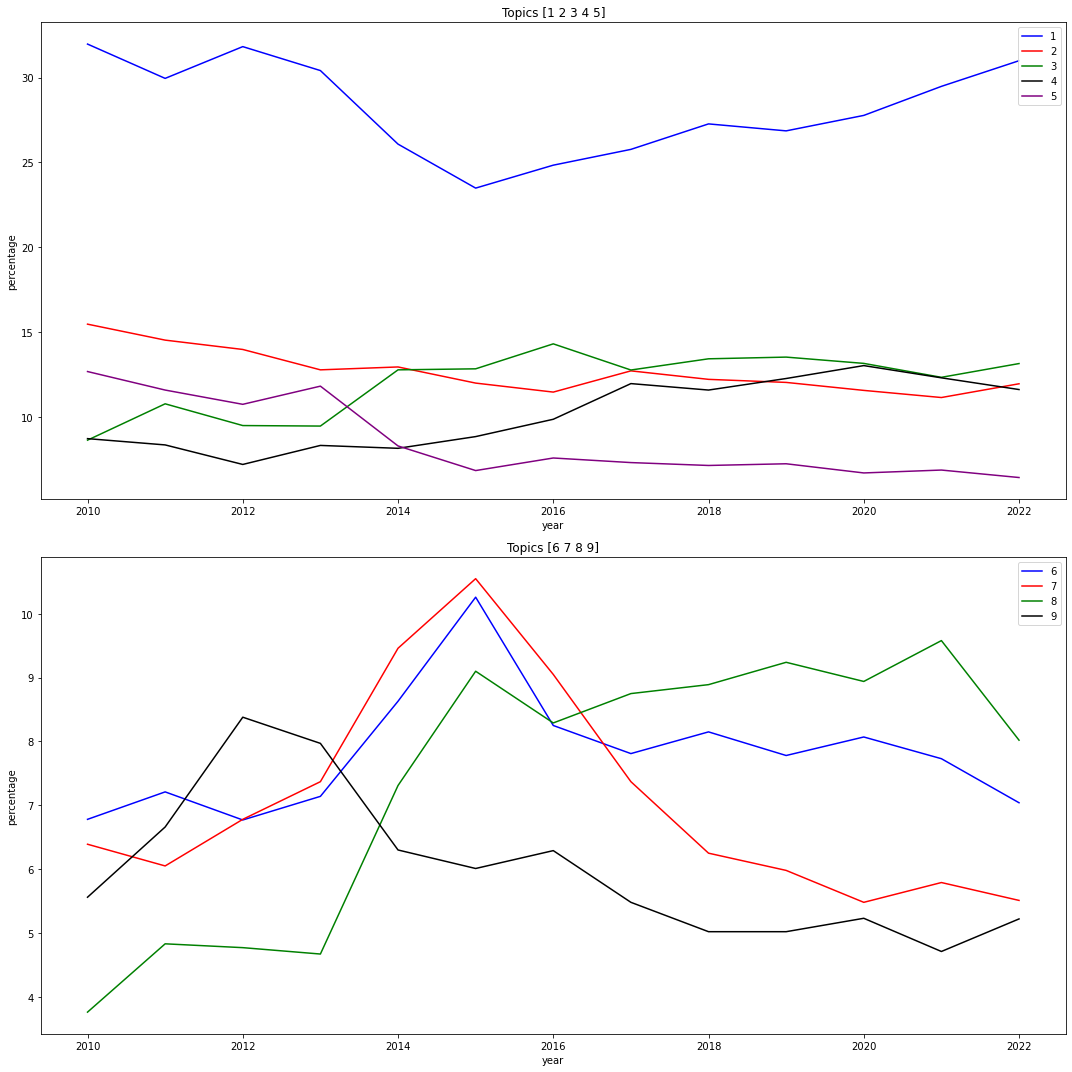

In [84]:
# visualization the proportionality of each topic with time series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique topics
topics = CTM_YEAR_PRO['topic'].unique()

# Define the number of plots per row and column
plots_per_row = 1
plots_per_column = int(np.ceil(len(topics) / 5.0 / plots_per_row))
# Define a palette with a list of contrasting colors
palette = ['blue', 'red', 'green', 'black', 'purple']
# Create a figure and axes for subplots
fig, axes = plt.subplots(plots_per_column, plots_per_row, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    # Get the topics for this subplot
    subplot_topics = topics[i*5:(i+1)*5]

    # Filter the data for these topics
    subplot_data = CTM_YEAR_PRO[CTM_YEAR_PRO['topic'].isin(subplot_topics)]
    
    # Skip empty plots
    if subplot_data.empty:
        continue

        
        
    # Create a color palette dictionary for the subplot
    subplot_palette = dict(zip(subplot_topics, palette))
    # Create the subplot with the defined palette
    sns.lineplot(x='year', y='percentage', hue='topic', data=subplot_data, ax=ax, palette=subplot_palette)
    # Set the title
    ax.set_title('Topics {}'.format(''.join(str(subplot_topics))))
    # Move the legend to outside of the plot on the upper left
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()


##  compare the coherence value in LDA and CTM models

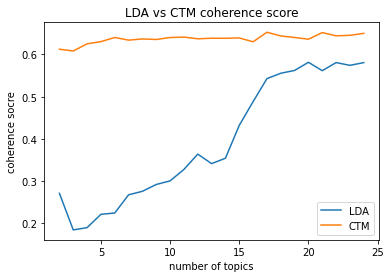

In [85]:
#plot LDA AND CTM coherence score in the same graph
x=range(start,limit,step)
plt.plot(x,coherence_values,label='LDA')
plt.plot(x,coherence_values_ctm,label='CTM')
plt.xlabel('number of topics')
plt.ylabel('coherence socre')
plt.title('LDA vs CTM coherence score')
plt.legend(loc='best')
plt.show()

In [86]:
# using other metrics (optional)
# using 'u_mass', 'c_uci', 'c_npmi'

# using several coherence measure 
def compute_coherence_LDA_other(corpus,dictionary,texts,start,limit,step):
    score={}
    model_lda={}
   
    for preset in ('u_mass', 'c_uci', 'c_npmi'):
        coherence_values=[]
        model_list=[]
        print('Calculating for',preset,'in LDA')
        for num_topics in range(start, limit, step):
            model=LdaModel(corpus=corpus,num_topics=num_topics,id2word=dictionary,iterations=200) # set the iteration for 100 times
            model_list.append(model)
            coherence=CoherenceModel(model=model,dictionary=dictionary,texts=texts,coherence=preset)
            coherence_values.append(coherence.get_coherence())
        score[preset]=coherence_values
        model_lda[preset]=model_list
    return model_lda,score


def compute_coherence_ctm_other(corpus,start,limit,step):
    score_ctm={}
    for preset in ('u_mass', 'c_uci', 'c_npmi'):
        coherence_values=[]
        model_list=[]
        print('Calculating for',preset,'in CTM')
        for num_topics in range(start, limit, step):
            # Create a CTM model
            model = tp.CTModel(min_df=70, rm_top=0,k=num_topics,corpus=corpus)
            # initializes the model, preparing it for training
            model.train(0)
            # A for loop is used to train the model for 50 iterations
            for i in range(0, 50, 2):
                model.train(2)
               
            model_list.append(model)
            #calculate the coherence score in CTM model
            coh = tp.coherence.Coherence(model, coherence=preset)
            average_coherence = coh.get_score()
            coherence_values.append(average_coherence)
        score_ctm[preset]=coherence_values
    return model_list,score_ctm

In [87]:
# executed coherence function and initialize the number of topics starta at 2 to 25
start = 2
limit = 25
step = 2
# in LDA
model_list_LDA_other,coherence_LDA_other=compute_coherence_LDA_other(corpus=corpus,dictionary=id2word, texts=df_pre_tm['tweet_nlp'], start=start, limit=limit, step=step)

# in CTM
# executed coherence function and initialize the number of topics starta at 4 to 40

model_list_ctm_other,coherence_values_ctm_other=compute_coherence_ctm_other(corpus=corpus_ctm,start=start, limit=limit, step=step)

Calculating for u_mass in LDA
Calculating for c_uci in LDA
Calculating for c_npmi in LDA
Calculating for u_mass in CTM
Calculating for c_uci in CTM
Calculating for c_npmi in CTM


metric: u_mass; average value : in LDA is -10.710554191760105; in CTM is -8.319067757743989


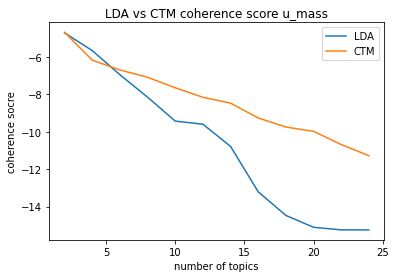

metric: c_uci; average value : in LDA is -5.462010347517885; in CTM is -3.187169270524103


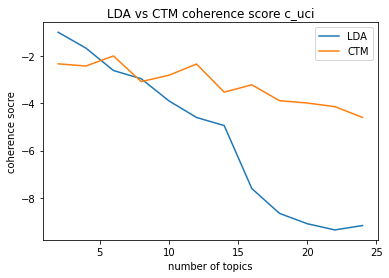

metric: c_npmi; average value : in LDA is -0.20520214695759156; in CTM is -0.1545134653679243


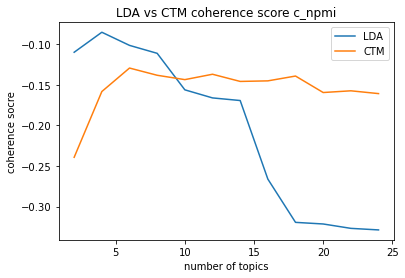

In [88]:
#plot LDA AND CTM coherence score in the same graph base on different coherence metrics
start = 2
limit = 25
step = 2
for key, value in coherence_values_ctm_other.items():
    x=range(start,limit,step)
    plt.plot(x,coherence_LDA_other[key],label='LDA')
    plt.plot(x,coherence_values_ctm_other[key],label='CTM')
    plt.xlabel('number of topics')
    plt.ylabel('coherence socre')
    plt.title(f'LDA vs CTM coherence score {key}')
    plt.legend(loc='best')
    print(f'metric: {key}; average value : in LDA is {np.average(coherence_LDA_other[key])}; in CTM is {np.average(coherence_values_ctm_other[key])}')
    plt.show()

# Sentiment Analysis

In [32]:
# import the Vader sentiment analysis from NLTK package
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\70733\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
#only selected tweets that are also included in the topic modeling sections
df_pre_st=df_pre_st[df_pre_st['id'].isin(df_pre_tm['id'])]
df_pre_st.reset_index(drop=True,inplace=True)


In [34]:
df_pre_st

author id       username  created_at                   id  \
0                  20233087     MrsDurham_  2010-01-30           8418832289   
1                  47052140     MrsDurham_  2010-01-30           8404189626   
2                  18110290     MrsDurham_  2010-01-30           8395814978   
3                  23487853     MrsDurham_  2010-01-30           8392841396   
4                  26057585     MrsDurham_  2010-01-30           8390874670   
...                     ...            ...         ...                  ...   
159150  1119787234121670656  uwengineering  2022-09-15  1570488723103707136   
159151  1480477689735696384  uwengineering  2022-09-15  1570488706154516480   
159152  1527390692317741056  uwengineering  2022-09-15  1570488598860017667   
159153  1550443169535377409  uwengineering  2022-09-15  1570488572742107137   
159154  1480452745635287043  uwengineering  2022-09-15  1570488524058791937   

        like_count  quote_count  reply_count  retweet_count  \
0                0            0            0              0   
1                0            0            0              0   
2                0            0            0              0   
3                0            0            0              0   
4                0            0            0              0   
...            ...          ...          ...            ...   
159150           3            0            0              2   
159151           6            0            0              2   
159152           9            0            0              8   
159153           4            0            0              4   
159154           4            1            0              3   

                                                    tweet  followers  \
0       I wish these people on #AI would stop giving m...       2170   
1       @JesusMonsterr did ya c #AI 2nit?? omg that du...       2170   
2       Watching #AI on the DVR- if Avril Lavigne want...       2170   
3       is it just me, & not that I'm a fan, but r peo...       2170   
4       Pants on the Ground is Grammy Bound: http://bi...       2170   
...                                                   ...        ...   
159150  In 1920, a Czech science fiction play was crea...      10787   
159151  @BSCGemsx100 @ArivaCoin Mine is $AWO of @AIWor...      10787   
159152  What companies think Artificial intelligence l...      10787   
159153  Opportunities in #InternetofThings 🌐🖥  via @Pa...      10787   
159154  Can someone in the #code #lowcode or #nocode c...      10787   

        tweet count  involve_count  \
0             58074            432   
1             58074            432   
2             58074            432   
3             58074            432   
4             58074            432   
...             ...            ...   
159150         5072            266   
159151         5072            266   
159152         5072            266   
159153         5072            266   
159154         5072            266   

                                              tweet_clean  
0       I wish these people on  would stop giving me g...  
1        did ya c  2nit?? omg that dude singin amazing...  
2       Watching  on the DVR- if Avril Lavigne wanted ...  
3       is it just me, & not that I'm a fan, but r peo...  
4                 Pants on the Ground is Grammy Bound:     
...                                                   ...  
159150  In , a Czech science fiction play was created ...  
159151    Mine is $AWO of   I've been leveraging on th...  
159152  What companies think Artificial intelligence l...  
159153   Opportunities in  🌐🖥  via   cc                    
159154  Can someone in the   or  community please crea...  

[159155 rows x 13 columns]

In [35]:
# Function to label sentiment as positive,negative or neutral based on compound score threshold
def labelfunction(x):
    if x > 0.05:
        return 'Positive'
    elif x <-0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [36]:
# validate the accuracy of Vader sentiment analysis in this study
# randomly sampled a subset of the data, and then munually label the tweet sentiment
sample_df = df_pre_st.sample(n=100, random_state=1)
#sample_df.to_csv('dataprocess/sentimentlabel.csv',index=False)
#after label the tweets sentiment, read the file.
after_sample_label = pd.read_csv('dataprocess/sentimentlabel.csv', encoding='latin1')
# due to we have label the tweets sentiment with -1(Negative),0(Neutral), 1(Positive), so need to convert it into Positive,Neutral, Negative
after_sample_label['manual_label']=after_sample_label['manual_label'].replace({-1:'Negative',0:'Neutral',1:'Positive'})



In [37]:
# using Vader tool to classify the tweets sentiment 
after_sample_label['score'] = after_sample_label['tweet_clean'].apply(lambda x: sid.polarity_scores(x))
# retrieve the compound score from the 'score' column
after_sample_label['compound_score']  = after_sample_label['score'].apply(lambda x: x['compound'])
#executed the label function, create a new 'label' column
after_sample_label['label'] = after_sample_label['compound_score'].apply(lambda x: labelfunction(x))
#save it to file
#after_sample_label.to_csv('dataprocess/labelwithsentiment.csv',index=False)

In [39]:
# compute the accuracy
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Score: ", accuracy_score(after_sample_label['manual_label'], after_sample_label['label']))
print(classification_report(after_sample_label['manual_label'], after_sample_label['label']))
#the result shows Vader is working correctly and can be used for classifying

Accuracy Score:  0.72
              precision    recall  f1-score   support

    Negative       0.63      0.67      0.65        18
     Neutral       0.85      0.72      0.78        47
    Positive       0.63      0.74      0.68        35

    accuracy                           0.72       100
   macro avg       0.71      0.71      0.70       100
weighted avg       0.74      0.72      0.72       100



After validation the Vader sentiment analysis, perform this tool on the whole dataset

In [40]:
# using Vader to compute the polarity and intensity sentiment in the whole dataset
df_pre_st['score'] = df_pre_st['tweet_clean'].apply(lambda x: sid.polarity_scores(x))
# retrieve the compound score from the 'score' column
df_pre_st['compound_score']  = df_pre_st['score'].apply(lambda x: x['compound'])
#executed the label function, create a new 'label' column
df_pre_st['label'] = df_pre_st['compound_score'].apply(lambda x: labelfunction(x))


#save the result for next section of identifying opinion leader
df_pre_st_op=df_pre_st.copy()

In [41]:
# only keep the relevant columns
df_pre_st=df_pre_st[['username','id','created_at','tweet_clean','score','compound_score','label']]
df_pre_st

username                   id  created_at  \
0          MrsDurham_           8418832289  2010-01-30   
1          MrsDurham_           8404189626  2010-01-30   
2          MrsDurham_           8395814978  2010-01-30   
3          MrsDurham_           8392841396  2010-01-30   
4          MrsDurham_           8390874670  2010-01-30   
...               ...                  ...         ...   
159150  uwengineering  1570488723103707136  2022-09-15   
159151  uwengineering  1570488706154516480  2022-09-15   
159152  uwengineering  1570488598860017667  2022-09-15   
159153  uwengineering  1570488572742107137  2022-09-15   
159154  uwengineering  1570488524058791937  2022-09-15   

                                              tweet_clean  \
0       I wish these people on  would stop giving me g...   
1        did ya c  2nit?? omg that dude singin amazing...   
2       Watching  on the DVR- if Avril Lavigne wanted ...   
3       is it just me, & not that I'm a fan, but r peo...   
4                 Pants on the Ground is Grammy Bound:      
...                                                   ...   
159150  In , a Czech science fiction play was created ...   
159151    Mine is $AWO of   I've been leveraging on th...   
159152  What companies think Artificial intelligence l...   
159153   Opportunities in  🌐🖥  via   cc                     
159154  Can someone in the   or  community please crea...   

                                                    score  compound_score  \
0       {'neg': 0.18, 'neu': 0.55, 'pos': 0.27, 'compo...          0.4199   
1       {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...          0.6950   
2       {'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp...         -0.3939   
3       {'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compou...         -0.1232   
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
...                                                   ...             ...   
159150  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...          0.7003   
159151  {'neg': 0.074, 'neu': 0.869, 'pos': 0.057, 'co...         -0.2003   
159152  {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp...          0.6808   
159153  {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'comp...          0.3818   
159154  {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...          0.8070   

           label  
0       Positive  
1       Positive  
2       Negative  
3       Negative  
4        Neutral  
...          ...  
159150  Positive  
159151  Negative  
159152  Positive  
159153  Positive  
159154  Positive  

[159155 rows x 7 columns]

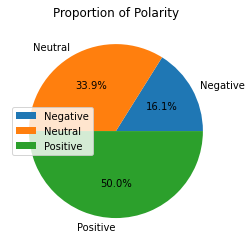

In [42]:
# compute the number of tweets in different polarities(positive,neutral,negative)
amount_of_sentiment=df_pre_st.groupby('label',as_index=False).agg(amount_of_sentiment=('tweet_clean','count'))
st_percent= amount_of_sentiment.plot(y='amount_of_sentiment', kind='pie', labels=amount_of_sentiment['label'], autopct='%1.1f%%')
st_percent.set_title('Proportion of Polarity')
st_percent.set_ylabel('') 
plt.legend(loc='center left')

#st_percent.legend().remove()  #remove legend
plt.show()

In [43]:
# add a new column to represent the year of tweets, compute the amount of tweets sentiment in three categories each year  
df_pre_st['created_at']=pd.to_datetime(df_pre_st['created_at'])
df_pre_st['year']=df_pre_st['created_at'].dt.year
# count the number of sentiment group by year
year_sentiment=df_pre_st.groupby(['year','label'],as_index=False).agg(amount=('tweet_clean','count'))
year_sentiment.head(10)

D:\16. Angaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\16. Angaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


year     label  amount
0  2010  Negative    3594
1  2010   Neutral    4569
2  2010  Positive    6902
3  2011  Negative    3602
4  2011   Neutral    5372
5  2011  Positive    8324
6  2012  Negative    3239
7  2012   Neutral    5907
8  2012  Positive    8281
9  2013  Negative    2712

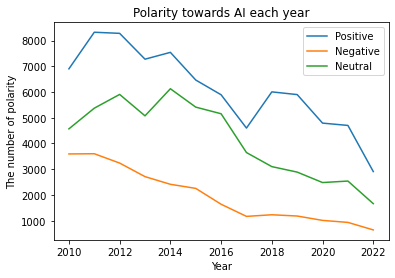

In [44]:
# Plot the line graph with Time series, visualization the amount of tweets sentiment in three categories each year 
# divide the year_sentiment into positive, neutral and negative sub dataframe
positive = year_sentiment[year_sentiment['label'] == 'Positive']
negative = year_sentiment[year_sentiment['label'] == 'Negative']
neutral = year_sentiment[year_sentiment['label'] == 'Neutral']

plt.plot(positive['year'], positive['amount'], label='Positive')
plt.plot(negative['year'], negative['amount'], label='Negative')
plt.plot(neutral['year'], neutral['amount'], label='Neutral')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('The number of polarity')
plt.title('Polarity towards AI each year')

# add legend
plt.legend()

# display the line graph
plt.show()

In [45]:
# visulize the aggregation  compound score of each year
# count the sum of compound score,average compound score of each tweet in three categories each year
score_year_sentiment=df_pre_st.groupby(['year','label'],as_index=False).agg(score_agg=('compound_score','sum'),amount=('tweet_clean','count'))
score_year_sentiment['total']=score_year_sentiment.groupby('year')['amount'].transform('sum')
# calculate each year, each sentiment classification percentage
score_year_sentiment['percentage']=score_year_sentiment['amount']/score_year_sentiment['total']
score_year_sentiment['score_avg']=score_year_sentiment['score_agg']/score_year_sentiment['amount']
score_year_sentiment.head(10)

year     label  score_agg  amount  total  percentage  score_avg
0  2010  Negative -1642.4649    3594  15065    0.238566  -0.457002
1  2010   Neutral     0.5117    4569  15065    0.303286   0.000112
2  2010  Positive  3778.8201    6902  15065    0.458148   0.547496
3  2011  Negative -1683.0625    3602  17298    0.208232  -0.467258
4  2011   Neutral    -0.0091    5372  17298    0.310556  -0.000002
5  2011  Positive  4633.9552    8324  17298    0.481212   0.556698
6  2012  Negative -1470.1618    3239  17427    0.185861  -0.453894
7  2012   Neutral     0.9622    5907  17427    0.338957   0.000163
8  2012  Positive  4569.1215    8281  17427    0.475182   0.551760
9  2013  Negative -1226.0627    2712  15064    0.180032  -0.452088

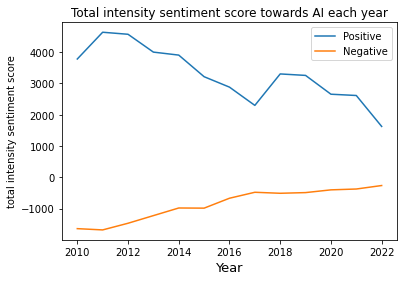

In [46]:
# Plot total intensity sentiment each year
# divide the year_sentiment into positive and negative sub dataframe
positive_sen = score_year_sentiment[score_year_sentiment['label'] == 'Positive']
negative_sen = score_year_sentiment[score_year_sentiment['label'] == 'Negative']

plt.plot(positive_sen['year'], positive_sen['score_agg'], label='Positive')
plt.plot(negative_sen['year'], negative_sen['score_agg'], label='Negative')


# Add labels and title
plt.xlabel('Year',fontsize=13)
plt.ylabel('total intensity sentiment score')
plt.title('Total intensity sentiment score towards AI each year')

# add legend
plt.legend(loc='best')

# display the line graph
plt.show()

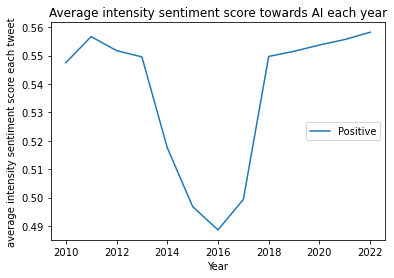

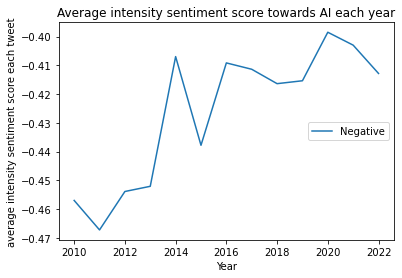

In [47]:
# plot the average compound score of each tweet each year
# plot  positive and negative in each year
positive_avg = score_year_sentiment[score_year_sentiment['label'] == 'Positive']
plt.plot(positive_avg['year'], positive_avg['score_avg'], label='Positive')


# Add labels and title
plt.xlabel('Year')
plt.ylabel('average intensity sentiment score each tweet')
plt.title('Average intensity sentiment score towards AI each year')

# add legend
plt.legend(loc='center right')

# display the line graph
plt.show()

# plot the Negative sentiment average compound score each year 
negative_avg = score_year_sentiment[score_year_sentiment['label'] == 'Negative']
plt.plot(negative_avg['year'], negative_avg['score_avg'], label='Negative')


# Add labels and title
plt.xlabel('Year')
plt.ylabel('average intensity sentiment score each tweet')
plt.title('Average intensity sentiment score towards AI each year')

# add legend
plt.legend(loc='center right')

# display the line graph
plt.show()



# Detecting Opinion Leader

In [48]:
import numpy as np
from numpy import percentile

In [49]:
#geeting the result from sentiment analysis section
df_pre_ol=df_pre_st_op.copy()
# compute the sum of 'like_count' and 'retweet_count' each user
# first calculate the number of likes and retweets as new column lr_times_ori
df_pre_ol['lr_times_ori']=df_pre_ol['like_count']+df_pre_ol['retweet_count']
lr_times=df_pre_ol.groupby('username')['lr_times_ori'].sum().reset_index(name='lr_times')
df_pre_ol=pd.merge(df_pre_ol,lr_times,on='username',how='left')
#calculate each user number of posted tweets excluding retweeted tweets
n_tweets=df_pre_ol.groupby('username').size().reset_index(name='n_tweets')
df_pre_ol=pd.merge(df_pre_ol,n_tweets,on='username',how='left')
df_pre_ol.head()

author id    username  created_at          id  like_count  quote_count  \
0   20233087  MrsDurham_  2010-01-30  8418832289           0            0   
1   47052140  MrsDurham_  2010-01-30  8404189626           0            0   
2   18110290  MrsDurham_  2010-01-30  8395814978           0            0   
3   23487853  MrsDurham_  2010-01-30  8392841396           0            0   
4   26057585  MrsDurham_  2010-01-30  8390874670           0            0   

   reply_count  retweet_count  \
0            0              0   
1            0              0   
2            0              0   
3            0              0   
4            0              0   

                                               tweet  followers  tweet count  \
0  I wish these people on #AI would stop giving m...       2170        58074   
1  @JesusMonsterr did ya c #AI 2nit?? omg that du...       2170        58074   
2  Watching #AI on the DVR- if Avril Lavigne want...       2170        58074   
3  is it just me, & not that I'm a fan, but r peo...       2170        58074   
4  Pants on the Ground is Grammy Bound: http://bi...       2170        58074   

   involve_count                                        tweet_clean  \
0            432  I wish these people on  would stop giving me g...   
1            432   did ya c  2nit?? omg that dude singin amazing...   
2            432  Watching  on the DVR- if Avril Lavigne wanted ...   
3            432  is it just me, & not that I'm a fan, but r peo...   
4            432            Pants on the Ground is Grammy Bound:      

                                               score  compound_score  \
0  {'neg': 0.18, 'neu': 0.55, 'pos': 0.27, 'compo...          0.4199   
1  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...          0.6950   
2  {'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp...         -0.3939   
3  {'neg': 0.06, 'neu': 0.94, 'pos': 0.0, 'compou...         -0.1232   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   

      label  lr_times_ori  lr_times  n_tweets  
0  Positive             0        13       233  
1  Positive             0        13       233  
2  Negative             0        13       233  
3  Negative             0        13       233  
4   Neutral             0        13       233

In [50]:
# calculate the influence score, add 1 in case of getting the negative infinity
df_pre_ol['Influence_ori']=(df_pre_ol['n_tweets']*np.log(df_pre_ol['lr_times']+1))

#calculte the activitity
df_pre_ol['Activity_ori']=(df_pre_ol['involve_count']/df_pre_ol['tweet count'])

#calculate the popularity
df_pre_ol['Popularity_ori']=(1-np.exp(-df_pre_ol['followers']))

# then normalize the value scale from 0 to 1
df_pre_ol['Influence']=(df_pre_ol['Influence_ori']-df_pre_ol['Influence_ori'].min())/(df_pre_ol['Influence_ori'].max()-df_pre_ol['Influence_ori'].min())

df_pre_ol['Activity']=(df_pre_ol['Activity_ori']-df_pre_ol['Activity_ori'].min())/(df_pre_ol['Activity_ori'].max()-df_pre_ol['Activity_ori'].min())

df_pre_ol['Popularity']=(df_pre_ol['Popularity_ori']-df_pre_ol['Popularity_ori'].min())/(df_pre_ol['Popularity_ori'].max()-df_pre_ol['Popularity_ori'].min())

# compute the Indicator score by adding three variables : Activity,Popularity,Influence, keep decimal 4 digits
df_pre_ol['Indicator']=(df_pre_ol['Influence']+df_pre_ol['Activity']+df_pre_ol['Popularity']).round(4)

In [51]:
df_pre_ol

author id       username  created_at                   id  \
0                  20233087     MrsDurham_  2010-01-30           8418832289   
1                  47052140     MrsDurham_  2010-01-30           8404189626   
2                  18110290     MrsDurham_  2010-01-30           8395814978   
3                  23487853     MrsDurham_  2010-01-30           8392841396   
4                  26057585     MrsDurham_  2010-01-30           8390874670   
...                     ...            ...         ...                  ...   
159150  1119787234121670656  uwengineering  2022-09-15  1570488723103707136   
159151  1480477689735696384  uwengineering  2022-09-15  1570488706154516480   
159152  1527390692317741056  uwengineering  2022-09-15  1570488598860017667   
159153  1550443169535377409  uwengineering  2022-09-15  1570488572742107137   
159154  1480452745635287043  uwengineering  2022-09-15  1570488524058791937   

        like_count  quote_count  reply_count  retweet_count  \
0                0            0            0              0   
1                0            0            0              0   
2                0            0            0              0   
3                0            0            0              0   
4                0            0            0              0   
...            ...          ...          ...            ...   
159150           3            0            0              2   
159151           6            0            0              2   
159152           9            0            0              8   
159153           4            0            0              4   
159154           4            1            0              3   

                                                    tweet  followers  ...  \
0       I wish these people on #AI would stop giving m...       2170  ...   
1       @JesusMonsterr did ya c #AI 2nit?? omg that du...       2170  ...   
2       Watching #AI on the DVR- if Avril Lavigne want...       2170  ...   
3       is it just me, & not that I'm a fan, but r peo...       2170  ...   
4       Pants on the Ground is Grammy Bound: http://bi...       2170  ...   
...                                                   ...        ...  ...   
159150  In 1920, a Czech science fiction play was crea...      10787  ...   
159151  @BSCGemsx100 @ArivaCoin Mine is $AWO of @AIWor...      10787  ...   
159152  What companies think Artificial intelligence l...      10787  ...   
159153  Opportunities in #InternetofThings 🌐🖥  via @Pa...      10787  ...   
159154  Can someone in the #code #lowcode or #nocode c...      10787  ...   

        lr_times_ori  lr_times n_tweets Influence_ori  Activity_ori  \
0                  0        13      233    614.900358      0.007439   
1                  0        13      233    614.900358      0.007439   
2                  0        13      233    614.900358      0.007439   
3                  0        13      233    614.900358      0.007439   
4                  0        13      233    614.900358      0.007439   
...              ...       ...      ...           ...           ...   
159150             5       584       21    133.803849      0.052445   
159151             8       584       21    133.803849      0.052445   
159152            17       584       21    133.803849      0.052445   
159153             8       584       21    133.803849      0.052445   
159154             7       584       21    133.803849      0.052445   

       Popularity_ori  Influence  Activity  Popularity  Indicator  
0                 1.0   0.610522       0.0         1.0     1.6105  
1                 1.0   0.610522       0.0         1.0     1.6105  
2                 1.0   0.610522       0.0         1.0     1.6105  
3                 1.0   0.610522       0.0         1.0     1.6105  
4                 1.0   0.610522       0.0         1.0     1.6105  
...               ...        ...       ...         ...        ...  
159150            1.0   0.132851       0.0         1.0    

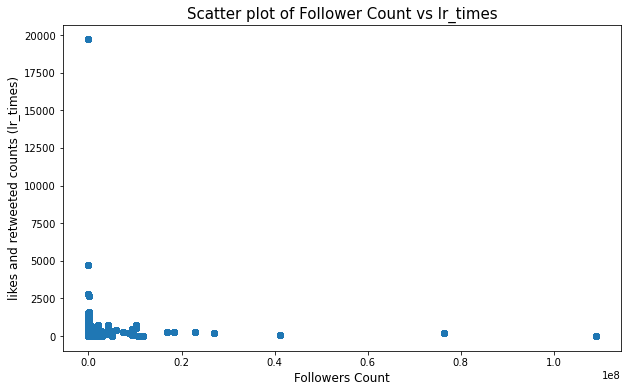

In [52]:

# there are some outliers that need to remove
df_pre_ol=df_pre_ol[(df_pre_ol['tweet count']>=df_pre_ol['involve_count'])&(df_pre_ol['tweet count']>=df_pre_ol['n_tweets'])&(df_pre_ol['involve_count']>=df_pre_ol['n_tweets'])]

# Plot the data
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = 'followers', y = 'lr_times', data=df_pre_ol)

# Set the x-label and y-label
ax.set_xlabel('Followers Count', fontsize=12)
ax.set_ylabel('likes and retweeted counts (lr_times)', fontsize=12)

# Set the title and adjust its font size to fit the width of the plot
ax.set_title('Scatter plot of Follower Count vs lr_times', fontsize=15)

plt.show()

In [53]:

# Create a new column 'coefficient' that normalizes the relationship between 'lr_times' and 'followers' 
df_pre_ol['coefficient']=df_pre_ol['lr_times']/df_pre_ol['followers'] 

# Sort the dataframe by 'coefficient' in descending order
df_pre_ol.sort_values(by='coefficient',ascending=False)

#using interquartile method to detect outlier
# calculates the 25th and 75th percentiles of 'coefficient'
q25,q75 = percentile(df_pre_ol['coefficient'], 25), percentile(df_pre_ol['coefficient'], 75) 
# calculates the interquartile range(iqr)
iqr = q75 - q25 

# Calculate the outlier cutoff
# calculates the cut-off point for identifying outliers,url=https://articles.outlier.org/calculate-outlier-formula
cut_off = iqr * 1.5 
# calculates the lower and upper boundary
lower, upper = q25 - cut_off, q75 + cut_off 

# Remove outliers,and only store non-outliers
outliers_removed_out = [x for x in df_pre_ol['coefficient'] if x >= lower and x <= upper] 

# Filter the dataframe 
df_pre_ol=df_pre_ol[df_pre_ol['coefficient'].apply(lambda x: x in outliers_removed_out)]

#just only choose related columns
df_ol=df_pre_ol[['username','id','created_at','tweet_clean','compound_score','label','Indicator']]

D:\16. Angaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
df_ol

username                   id  created_at  \
0          MrsDurham_           8418832289  2010-01-30   
1          MrsDurham_           8404189626  2010-01-30   
2          MrsDurham_           8395814978  2010-01-30   
3          MrsDurham_           8392841396  2010-01-30   
4          MrsDurham_           8390874670  2010-01-30   
...               ...                  ...         ...   
159150  uwengineering  1570488723103707136  2022-09-15   
159151  uwengineering  1570488706154516480  2022-09-15   
159152  uwengineering  1570488598860017667  2022-09-15   
159153  uwengineering  1570488572742107137  2022-09-15   
159154  uwengineering  1570488524058791937  2022-09-15   

                                              tweet_clean  compound_score  \
0       I wish these people on  would stop giving me g...          0.4199   
1        did ya c  2nit?? omg that dude singin amazing...          0.6950   
2       Watching  on the DVR- if Avril Lavigne wanted ...         -0.3939   
3       is it just me, & not that I'm a fan, but r peo...         -0.1232   
4                 Pants on the Ground is Grammy Bound:             0.0000   
...                                                   ...             ...   
159150  In , a Czech science fiction play was created ...          0.7003   
159151    Mine is $AWO of   I've been leveraging on th...         -0.2003   
159152  What companies think Artificial intelligence l...          0.6808   
159153   Opportunities in  🌐🖥  via   cc                            0.3818   
159154  Can someone in the   or  community please crea...          0.8070   

           label  Indicator  
0       Positive     1.6105  
1       Positive     1.6105  
2       Negative     1.6105  
3       Negative     1.6105  
4        Neutral     1.6105  
...          ...        ...  
159150  Positive     1.1329  
159151  Negative     1.1329  
159152  Positive     1.1329  
159153  Positive     1.1329  
159154  Positive     1.1329  

[131507 rows x 7 columns]

### Detecting the top n opinion leader

In [55]:
# identify the top 10 opinion leader
identify_df=df_ol.sort_values(by='Indicator',ascending=False)
top_10_user=identify_df['username'].unique()[:10]
top_10_user

array(['BernardMarr', 'GoldmanSachs', 'TechCrunch', 'Zayy7_', 'dbworld_',
       'franborrell', 'jdmarkman', 'ai', 'iotsecurity2', 'ilanawaber'],
      dtype=object)

In [ ]:
# array(['BernardMarr', 'GoldmanSachs', 'TechCrunch', 'Zayy7_', 'dbworld_',
#        'franborrell', 'jdmarkman', 'ai', 'iotsecurity2', 'ilanawaber'],
#       dtype=object)

#### classify the top 10 opinion leaders Polarity

In [56]:
# identify the top 10 user tweets and sentiment label
df_ol_top=df_ol[df_ol['username'].isin(top_10_user)]
df_ol_top

username                   id  created_at  \
44178   franborrell   223901464328806400  2012-07-13   
44179   franborrell   223896745434816514  2012-07-13   
44180   franborrell   223895763401449474  2012-07-13   
44181   franborrell   223894999421566976  2012-07-13   
44182   franborrell   223892540200452096  2012-07-13   
...             ...                  ...         ...   
153563  BernardMarr  1476660611345891333  2021-12-30   
153564  BernardMarr  1476660477388378116  2021-12-30   
153565  BernardMarr  1476660408001908740  2021-12-30   
153566  BernardMarr  1476659981789323270  2021-12-30   
153567  BernardMarr  1476659897613762563  2021-12-30   

                                              tweet_clean  compound_score  \
44178   Whats wrong with ? All    judges are leaving t...         -0.4767   
44179   Video: As Humans and Computers Merge... Immort...          0.0000   
44180     players who havent done / the things  has do...          0.0000   
44181      already knows he has love from millions fan...          0.6369   
44182   I wonder how J-Lo felt about Steven Tyler anno...          0.0000   
...                                                   ...             ...   
153563  Vivaldi browser is coming to your car, for som...          0.0000   
153564  The is a large segment of the population out t...         -0.2003   
153565  Introducing the Trivergence: Transformation dr...          0.0000   
153566           New  Substances by                                0.0000   
153567  AI for everyone! Here's how the no-code Square...          0.0000   

           label  Indicator  
44178   Negative     1.8183  
44179    Neutral     1.8183  
44180    Neutral     1.8183  
44181   Positive     1.8183  
44182    Neutral     1.8183  
...          ...        ...  
153563   Neutral     2.0000  
153564  Negative     2.0000  
153565   Neutral     2.0000  
153566   Neutral     2.0000  
153567   Neutral     2.0000  

[1568 rows x 7 columns]

In [57]:
# detect the top 10 opinion leader sentiment 
#calculate the average sentiment of each user
sentiment_diff=df_ol_top.groupby('username')['label'].apply(lambda x:(x=='Positive').sum()-(x=='Negative').sum())
# when the number of positive tweets > negative tweets, labelled as 'Positve', and vice versa
sentiment_label=sentiment_diff.apply(lambda x:'Positive' if x>=0 else 'Negative')
sentiment_label = sentiment_label.reset_index()
sentiment_label.columns = ['username', 'label']
df_ol_top_unique = df_ol_top.drop_duplicates(subset='username')
#add the Indicator score for each opinion leader in the dataframe
sentiment_label=pd.merge(sentiment_label,df_ol_top_unique[['username','Indicator']],on='username')
sentiment_label.sort_values(by='Indicator',inplace=True)
sentiment_label.reset_index(drop=True)

username     label  Indicator
0    ilanawaber  Positive     1.7623
1  iotsecurity2  Positive     1.7735
2            ai  Positive     1.7783
3     jdmarkman  Positive     1.8009
4   franborrell  Positive     1.8183
5      dbworld_  Positive     1.8368
6        Zayy7_  Positive     1.8438
7    TechCrunch  Positive     1.9029
8  GoldmanSachs  Positive     1.9519
9   BernardMarr  Positive     2.0000

In [58]:
# compute the number of positve tweets
num_pos=df_ol_top.groupby('username',as_index=False)['label'].apply(lambda x:(x=='Positive').sum())
num_pos.rename(columns={'label': 'num_positive'}, inplace=True)
# compute the number of negative tweets
num_neg=df_ol_top.groupby('username',as_index=False)['label'].apply(lambda x:(x=='Negative').sum())
num_neg.rename(columns={'label': 'num_negative'}, inplace=True)
#merge the result in a new dataframe
num_polarity=pd.merge(num_pos,num_neg,on='username',how='inner')
num_polarity

username  num_positive  num_negative
0   BernardMarr            68            24
1  GoldmanSachs            78            22
2    TechCrunch            68            17
3        Zayy7_           114            23
4            ai            59            26
5      dbworld_            75            19
6   franborrell            75            30
7    ilanawaber            96            20
8  iotsecurity2            56            19
9     jdmarkman            59            53

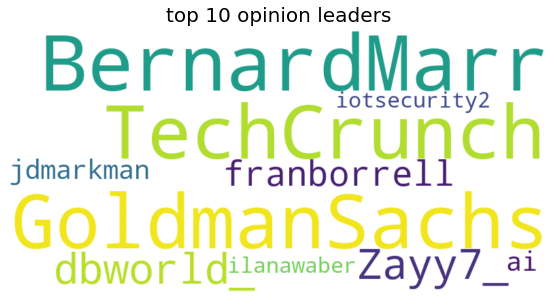

In [59]:
# visualization the top 10 opinion leaders in word cloud, and the weight of size based on he Indicator score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create wordcloud
frequency_op=sentiment_label.set_index('username')['Indicator'].to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='#fff').generate_from_frequencies(frequency_op)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('top 10 opinion leaders',fontsize=20)
plt.show()

### compute the top n opinion leaders Intensity score

In [60]:
# compute the intensity score per person  
intensity_user=df_ol_top.groupby('username',as_index=False).agg(score_agg=('compound_score','sum'),tweet_count=('tweet_clean','count'))
intensity_user.sort_values(by='score_agg',ascending=False,inplace=True)
# if the total intensity score of each user(i.g. score_agg)>0, then it is labelled as 'Positve', and vice versa 'Negative'
intensity_user['label']=intensity_user['score_agg'].apply(lambda x :'Positive' if x>0 else 'Negative')
#compute the average intensity score of each opinion leader
intensity_user['score_avg']=intensity_user['score_agg']/intensity_user['tweet_count']
intensity_user=intensity_user.reset_index(drop=True)
intensity_user

username  score_agg  tweet_count     label  score_avg
0        Zayy7_    60.6569          171  Positive   0.354719
1    ilanawaber    48.3167          157  Positive   0.307750
2      dbworld_    30.9725          147  Positive   0.210697
3  GoldmanSachs    29.7778          182  Positive   0.163614
4   BernardMarr    27.1641          143  Positive   0.189959
5   franborrell    26.9385          196  Positive   0.137441
6    TechCrunch    24.0194          144  Positive   0.166801
7  iotsecurity2    23.0848          134  Positive   0.172275
8            ai    16.5722          131  Positive   0.126505
9     jdmarkman     2.8205          163  Positive   0.017304

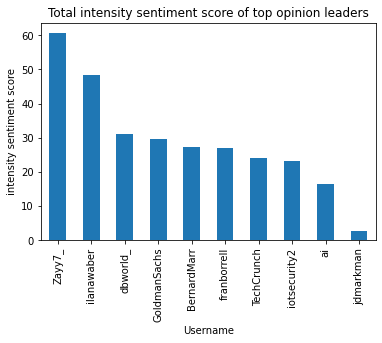

In [61]:
#plot the top n user total intensity score
intensity_user.plot(kind='bar',x='username',y='score_agg',legend=False)
plt.xlabel('Username')
plt.ylabel('intensity sentiment score')
plt.title('Total intensity sentiment score of top opinion leaders')
plt.show()


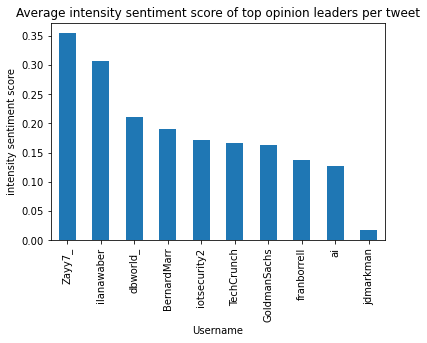

In [62]:
#plot the top n user average intensity score
intensity_user.sort_values(by='score_avg',ascending=False).plot(kind='bar',x='username',y='score_avg',legend=False)
plt.xlabel('Username')
plt.ylabel('intensity sentiment score')
plt.title('Average intensity sentiment score of top opinion leaders per tweet')
plt.show()


In [63]:
# check the top 10 opinion leaders information in the dataset
df_pre_ol[df_pre_ol['username'].isin(top_10_user)][['username','followers','tweet count','involve_count','lr_times','n_tweets','Indicator']].drop_duplicates(subset='username',keep='first')

username  followers  tweet count  involve_count  lr_times  \
44178    franborrell        295        72642            373        66   
60525       dbworld_        859        40217            482       308   
61626         Zayy7_        662        14829            288       143   
61797     ilanawaber        510         4302            269       132   
76116             ai      21676        14438            496       396   
76649   GoldmanSachs     956580        15513            442       193   
83506     TechCrunch   10276816       243538            771       552   
89007      jdmarkman      26547        11862            442       140   
98341   iotsecurity2       1922       118667            394       334   
112633   BernardMarr     135911        36411            926      1144   

        n_tweets  Indicator  
44178        196     1.8183  
60525        147     1.8368  
61626        171     1.8438  
61797        157     1.7623  
76116        131     1.7783  
76649        182     1.9519  
83506        144     1.9029  
89007        163     1.8009  
98341        134     1.7735  
112633       143     2.0000

### detecting the top 10 opinion leaders association with topics

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# function for visualizing the engagement with topics each top 10 opinion leaders
def op_topic_amount(df):

    # Get the unique topics
    topics = df['topic'].unique()

    # Define the number of plots per row and column
    plots_per_row = 2
    plots_per_column = int(np.ceil(len(topics) / 10))

    # Create a figure and axes for subplots
    fig, axes = plt.subplots(plots_per_column, plots_per_row, figsize=(15, 6*plots_per_column))

    for i, ax in enumerate(axes.flatten()):
        # Get the topics for this subplot
        subplot_topics = topics[i*5:(i+1)*5]

        # Filter the data for these topics
        subplot_data = df[df['topic'].isin(subplot_topics)]

        # Skip empty plots
        if subplot_data.empty:
            continue

        # Loop over the topics for this subplot
        for topic in subplot_topics:
            # Filter the data for this line
            line_data = subplot_data[subplot_data['topic'] == topic]

            # Create the line on the current axes
            sns.lineplot(x='username', y='amount', data=line_data, ax=ax, label=f'Topic {topic}')

            # Rotate the x-axis labels for better visibility
            ax.tick_params(axis='x', rotation=90)

        # Move the legend to outside of the plot on the upper left
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()



In [65]:
#in LDA model
#First select the top 10 onipinon leaders tweets and topic label
LDA_op_distri=df_LDA_tp_distri.copy()
LDA_op_distri=LDA_op_distri[LDA_op_distri['username'].isin(top_10_user)]
# label the topic start with 1 rather than of 0
LDA_op_distri['topic']=LDA_op_distri['topic']+1
LDA_op_amount=LDA_op_distri.groupby(['topic','username'], as_index=False).agg(amount=('id','count'))
LDA_op_amount

topic      username  amount
0        1   BernardMarr      39
1        1  GoldmanSachs      50
2        1    TechCrunch      43
3        1        Zayy7_      47
4        1            ai      53
..     ...           ...     ...
176     19      dbworld_       3
177     19   franborrell      10
178     19    ilanawaber       3
179     19  iotsecurity2       5
180     19     jdmarkman       2

[181 rows x 3 columns]

D:\16. Angaconda\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
D:\16. Angaconda\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
D:\16. Angaconda\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
D:\16. Angaconda\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit conv

D:\16. Angaconda\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
D:\16. Angaconda\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
D:\16. Angaconda\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
D:\16. Angaconda\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit conve

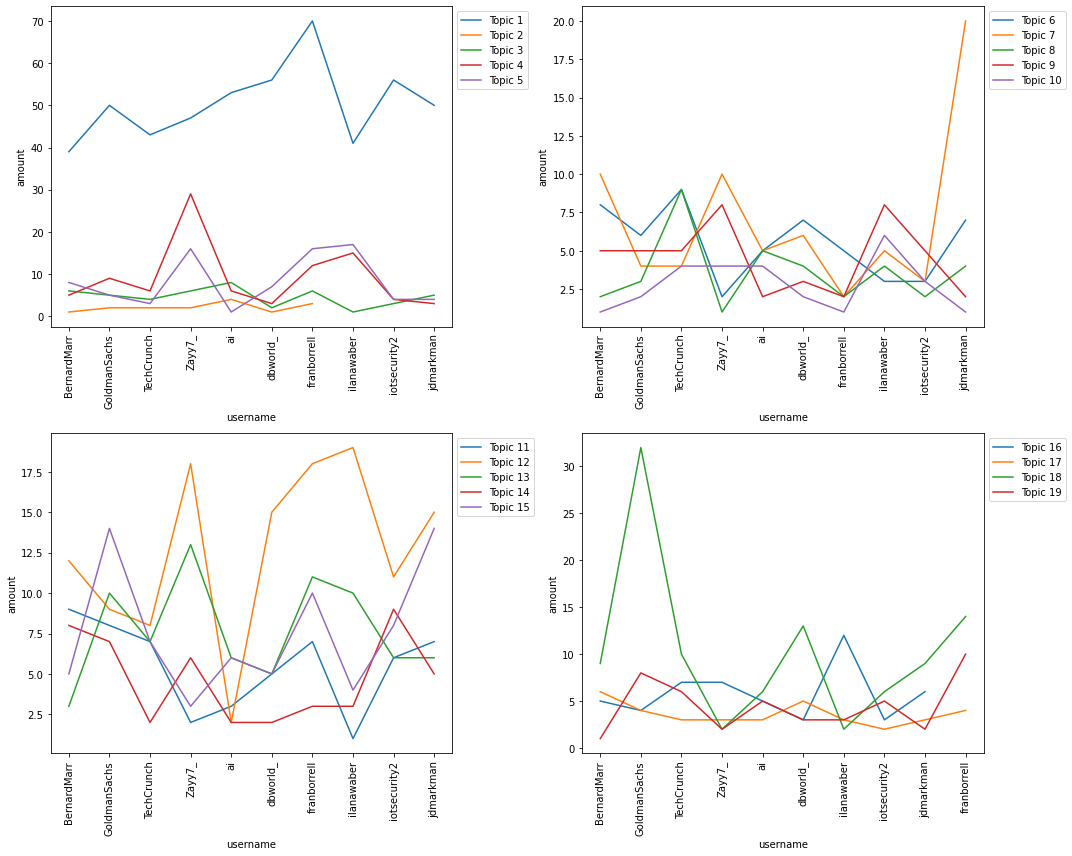

In [66]:
# visualization topics generated in LDA model
op_topic_amount(LDA_op_amount)

In [92]:
# In CTM model

# detect some leaders linked more to specific topics
# identify the top 10 user tweets and sentiment label
#First select the top 10 onipinon leaders tweets and topic label
CTM_op_distri=df_CTM_tp_distri.copy()
#select the top 10 opinion leaders tweets
CTM_op_distri=CTM_op_distri[CTM_op_distri['username'].isin(top_10_user)]
# label the topic start with 1 rather than of 0
CTM_op_distri['topic']=CTM_op_distri['topic']+1
CTM_op_distri
CTM_op_amount=CTM_op_distri.groupby(['topic','username'], as_index=False).agg(amount=('id','count'))

In [93]:
CTM_op_amount

topic      username  amount
0       1   BernardMarr      28
1       1  GoldmanSachs      52
2       1    TechCrunch      45
3       1        Zayy7_      18
4       1            ai      32
..    ...           ...     ...
85      9      dbworld_      14
86      9   franborrell      18
87      9    ilanawaber      19
88      9  iotsecurity2      12
89      9     jdmarkman       9

[90 rows x 3 columns]

D:\16. Angaconda\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
D:\16. Angaconda\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
D:\16. Angaconda\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
D:\16. Angaconda\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit conv

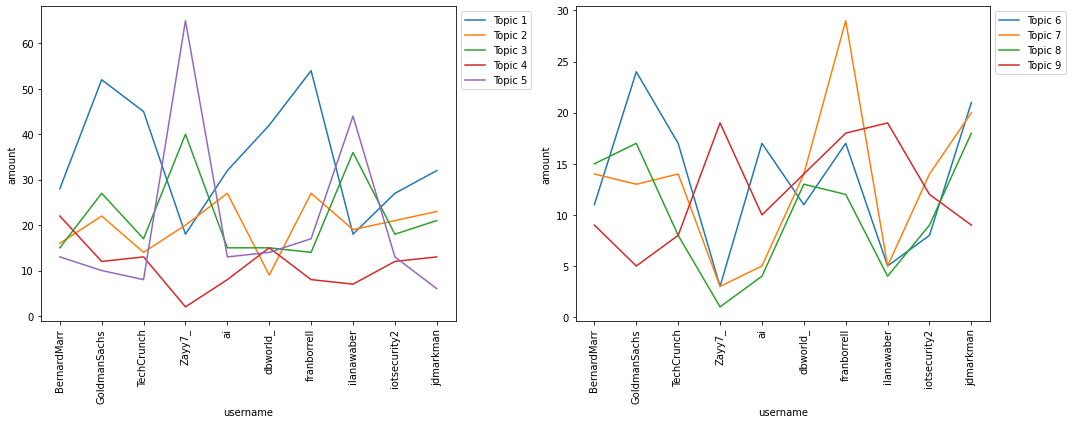

In [94]:
# visualization topics generated in CTM model
op_topic_amount(CTM_op_amount)